# Chapter 01 : iris 데이터로 기본적인 군집분석(clustering) 원리와 분석 과정을 연습해보자.

## Step0: 군집분석의 기본지식 및 학습목표 확인

### **군집분석이란**?  
: **unsupervised learning**으로, 데이터 간의 유사도를 정의하고 그 유사도에 가까운 것부터 순서대로 합쳐 가는 방법이며, 유사도의 정의에는 거리나 상관계수 등 여러 가지가 있다. 

### **군집분석의 기본지식**  
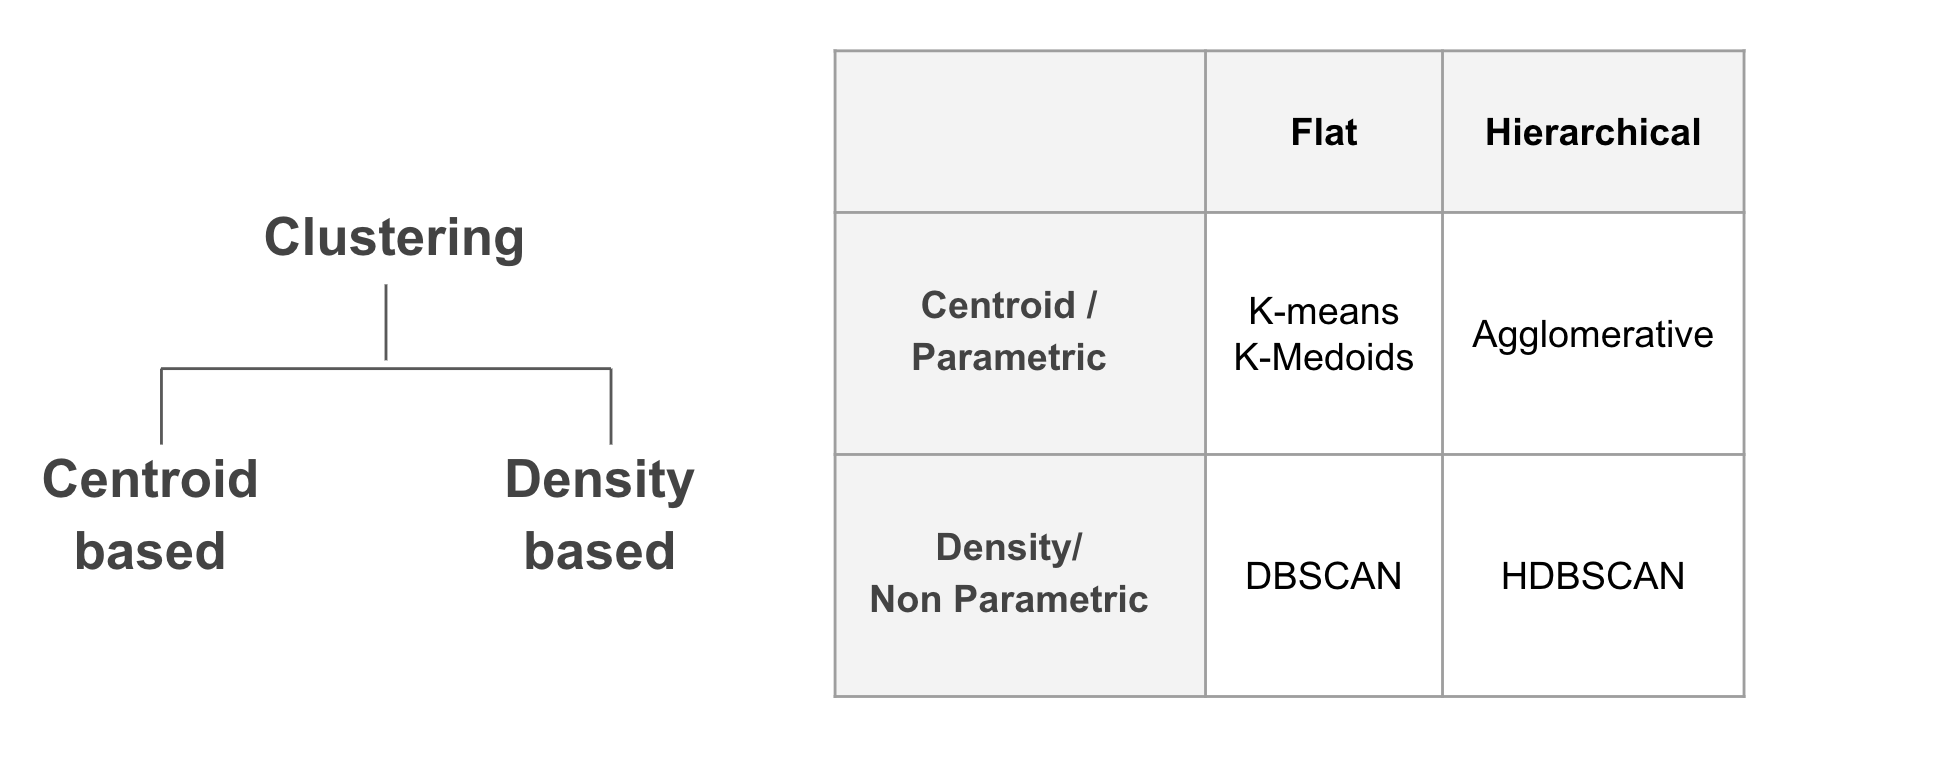


### **학습목표**
```
- 군집분석(Clustering)의 다양한 알고리즘을 경험.
- 알고리즘 훈련에 필요한 파라미터를 알맞게 조절.
- 알고리즘 훈련 결과를 시각화, 수치화를 통해 평가.
- 서로 다른 알고리즘의 차이점을 이해.
``` 

## Step1: 데이터 불러오기 & 전처리

### iris 데이터 불러오기

In [1]:
# 강의에 필요한 모듈 import 하기.
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split


In [2]:
# iris 데이터셋 불러오기
# iris 데이터셋: 꽃받침과 꽃잎 사이즈로 3가지 종류의 case로 분류되어있는 데이터.
iris = load_iris() 

# 데이터를 dataframe화 시키기.
# array 형태를 Dataframe으로 변환. 
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

### 문제 1. EDA - 컬럼명 재할당하기 
: 컬럼명을 아래와 같이 변경해줍니다.  

변경전 -> 변경후    
`sepal length` -> `sepal_length`  
`sepal width` -> `sepal_width`  
`petal length` -> `petal_length`  
`petal length` -> `petal_width`  

In [3]:
# 컬럼명을 사용하기 편하게 변경해보세요.
column_name_lst = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# 방법1: 순서대로 입력.
# iris_df.columns = column_name_lst

# 방법2: dictionary형태를 사용하여 변경.
column_replace_dict = {k:v for k,v in zip(iris.feature_names, column_name_lst)}
iris_df.rename(column_replace_dict, axis="columns", inplace=True) # axis="columns" >> axis=1 가능.
print(iris_df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [4]:
# target 컬럼을 추가해보세요.
# target label은 iris.target에서 확인가능.
iris_df["target"] = iris.target

# target 종류를 확인해보세요.
iris_df.target.unique()

array([0, 1, 2])

### 문제 2. EDA - 결측값 확인하기  
: 각 컬럼의 결측값을 확인하고 결측값을 채워줍니다.

In [5]:
# 간단하게 컬럼별 결측값 유무 확인해보세요.
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

### 문제 3. EDA - 데이터 시각화 해보기
: 각 컬럼의 특징을 파악하고 시각화를 통해 데이터의 분포를 확인합니다.

In [6]:
# 컬럼별 데이터 type을 확인해보세요.
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [7]:
# 컬럼별 분포 특징을 확인해보세요.
# 분위수를 통해 정규화과정(normalization)이 필요한지도 생각해보세요.
iris_df.describe()

sepal_length  sepal_width  petal_length  petal_width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

In [8]:
# plotly를 사용하여 scatter plot 시각화 해보세요.

# plotly 모듈 import.
# plotly에서 express 사용해보기.
import plotly.express as px

# scatter plot 생성.
fig = px.scatter(iris_df, x="sepal_width", y="sepal_length")
# 그래프 사이즈 조절.
fig.update_layout(width=600, height=500)
# 그래프 확인.
fig.show()


In [9]:
# scatter plot에 target컬럼 색으로 나타내기.
fig = px.scatter(iris_df, x="sepal_width", y="sepal_length", color="target")
fig.update_layout(width=600, height=500)
fig.show()


In [10]:
# 다른 컬럼으로 scatter plot 만들기.
fig = px.scatter(iris_df, x="petal_width", y="petal_length", color="target")
fig.update_layout(width=600, height=500)
fig.show()


## Step2: Clustering : K-Means 알고리즘

### 문제 4. Clustering : K-Means - K-Means 모듈 탐색하기.

{TODO: 여기에 간략하게 k-means 원리를 설명할 예정, 앞강의에 k-means가 언급되므로 간략하게만}

In [11]:
# K-Means 모듈을 import 합니다.
from sklearn.cluster import KMeans
# help(KMeans)


### 문제 5. Clustering : K-Means - train, test set으로 분리하기.

In [12]:
# iris 데이터를 X,Y로 나눠보세요.
X = iris_df.iloc[:, :-1]
Y = iris_df.iloc[:, -1]

# train_test_split를 사용하여 iris 데이터를 train/test로 8:2의 비율로 나눠보세요.
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

120 30


### 문제 6. Clustering : K-Means - K-Means 모듈 훈련시키기.

In [13]:
# target이 3개인 것을 앞서 확인했지만, 5개의 그룹으로 clustering을 해봅니다.
km = KMeans(n_clusters = 5)
km

KMeans(n_clusters=5)

In [14]:
# train set을 훈련시키고 cluster 결과를 확인합니다.
km.fit(train_x)
clusters_array = km.labels_
print(clusters_array)

[3 0 1 2 1 1 4 1 3 0 4 1 1 1 1 3 3 0 0 2 0 3 4 1 3 0 1 0 4 1 2 1 0 1 4 0 4
 1 0 2 0 4 1 4 1 4 1 1 4 1 1 4 2 3 3 3 0 2 1 0 1 4 3 3 1 3 0 1 4 3 3 1 2 0
 1 0 1 1 0 1 4 0 1 1 0 3 1 1 4 1 0 3 1 1 0 1 0 3 1 2 0 4 0 4 0 1 2 3 4 4 3
 0 0 0 4 2 0 0 0 3]


In [15]:
# 실제 iris데이터의 그룹과 훈련된 cluster의 결과를 비교해봅니다.
compare_clusters = dict(zip(clusters_array, train_y))
print(compare_clusters)


{3: 1, 0: 1, 1: 0, 2: 2, 4: 2}


In [16]:
# 훈련된 label을 기준으로 시각화해보세요.
fig = px.scatter(x=train_x["petal_width"], y=train_x["petal_length"], color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()


In [17]:
fig = px.scatter(x=train_x["sepal_width"], y=train_x["sepal_length"], color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()


In [18]:
# Sum of squared distances of samples to their closest cluster center.
# [참고] k-means 알고리즘의 특성상, 훈련할때마다 km.inertia_ 값도 차이가 생깁니다.
km.inertia_

37.15537344913151

### 문제 7. Clustering : K-Means - 최적의 k 찾기 (Elbow method).
: unsupervised 방법이므로 실제로 k(cluster 수)는 정해져 있지 않습니다. 따라서 최적의 k를 찾는 것부터 시작하게 됩니다. 

```
최적의 k를 찾는 것이 k-means의 전체과정 중에서 가장 중요한 step입니다.
```

> "Elbow method"란?  
: **Total intra-cluster variation (or total within-cluster sum of square (=WSS))**가 최소가 되는 k를 찾는 방법.




In [19]:
# elbow method를 사용하여 최적의 k를 찾아봅시다.
# k와 sum of squared distances from each point의 합(distortions)을 비교합니다.

distortions = [] 
k_range = range(1,11)
for i in k_range:
  km = KMeans(n_clusters = i)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[540.6305000000001, 121.57666666666665, 62.679312158808926, 44.96781937401853, 37.20486948761482, 30.526519103574447, 26.10663584656085, 22.868061111111118, 21.530277650454124, 20.028177128427124]


In [20]:
# elbow method를 그래프를 통해 이해해 봅시다.
# x축이 k의 수, y축이 distortions인 line plot을 그려봅시다.
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=500)
fig.show()

### 문제 8. Clustering : K-Means - 최적의 k 찾기 (KElbowVisualizer 사용해보기).
: model 훈련과 함께 그래프를 그려주고 훈련 시간까지 확인해주는 모듈인 KElbowVisualizer를 사용해봅니다.  
> Yellowbrick extends the Scikit-Learn API to make a model selection and hyperparameter tuning easier.


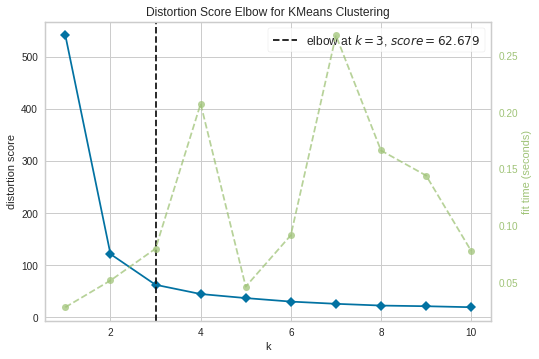

In [21]:
# KElbowVisualizer 사용해서 훈련(training)과 그래프를 한번에 해결해보세요.
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,11))
visualizer.fit(train_x)
visualizer.poof() 

### 문제 9. Clustering : K-Means - 최적의 k 찾기 (kneed 모듈 사용해보기).
: 그래프를 확인하지 않고도 최적의 k값을 자동으로 찾아주는 모듈인 kneed를 사용해봅니다.

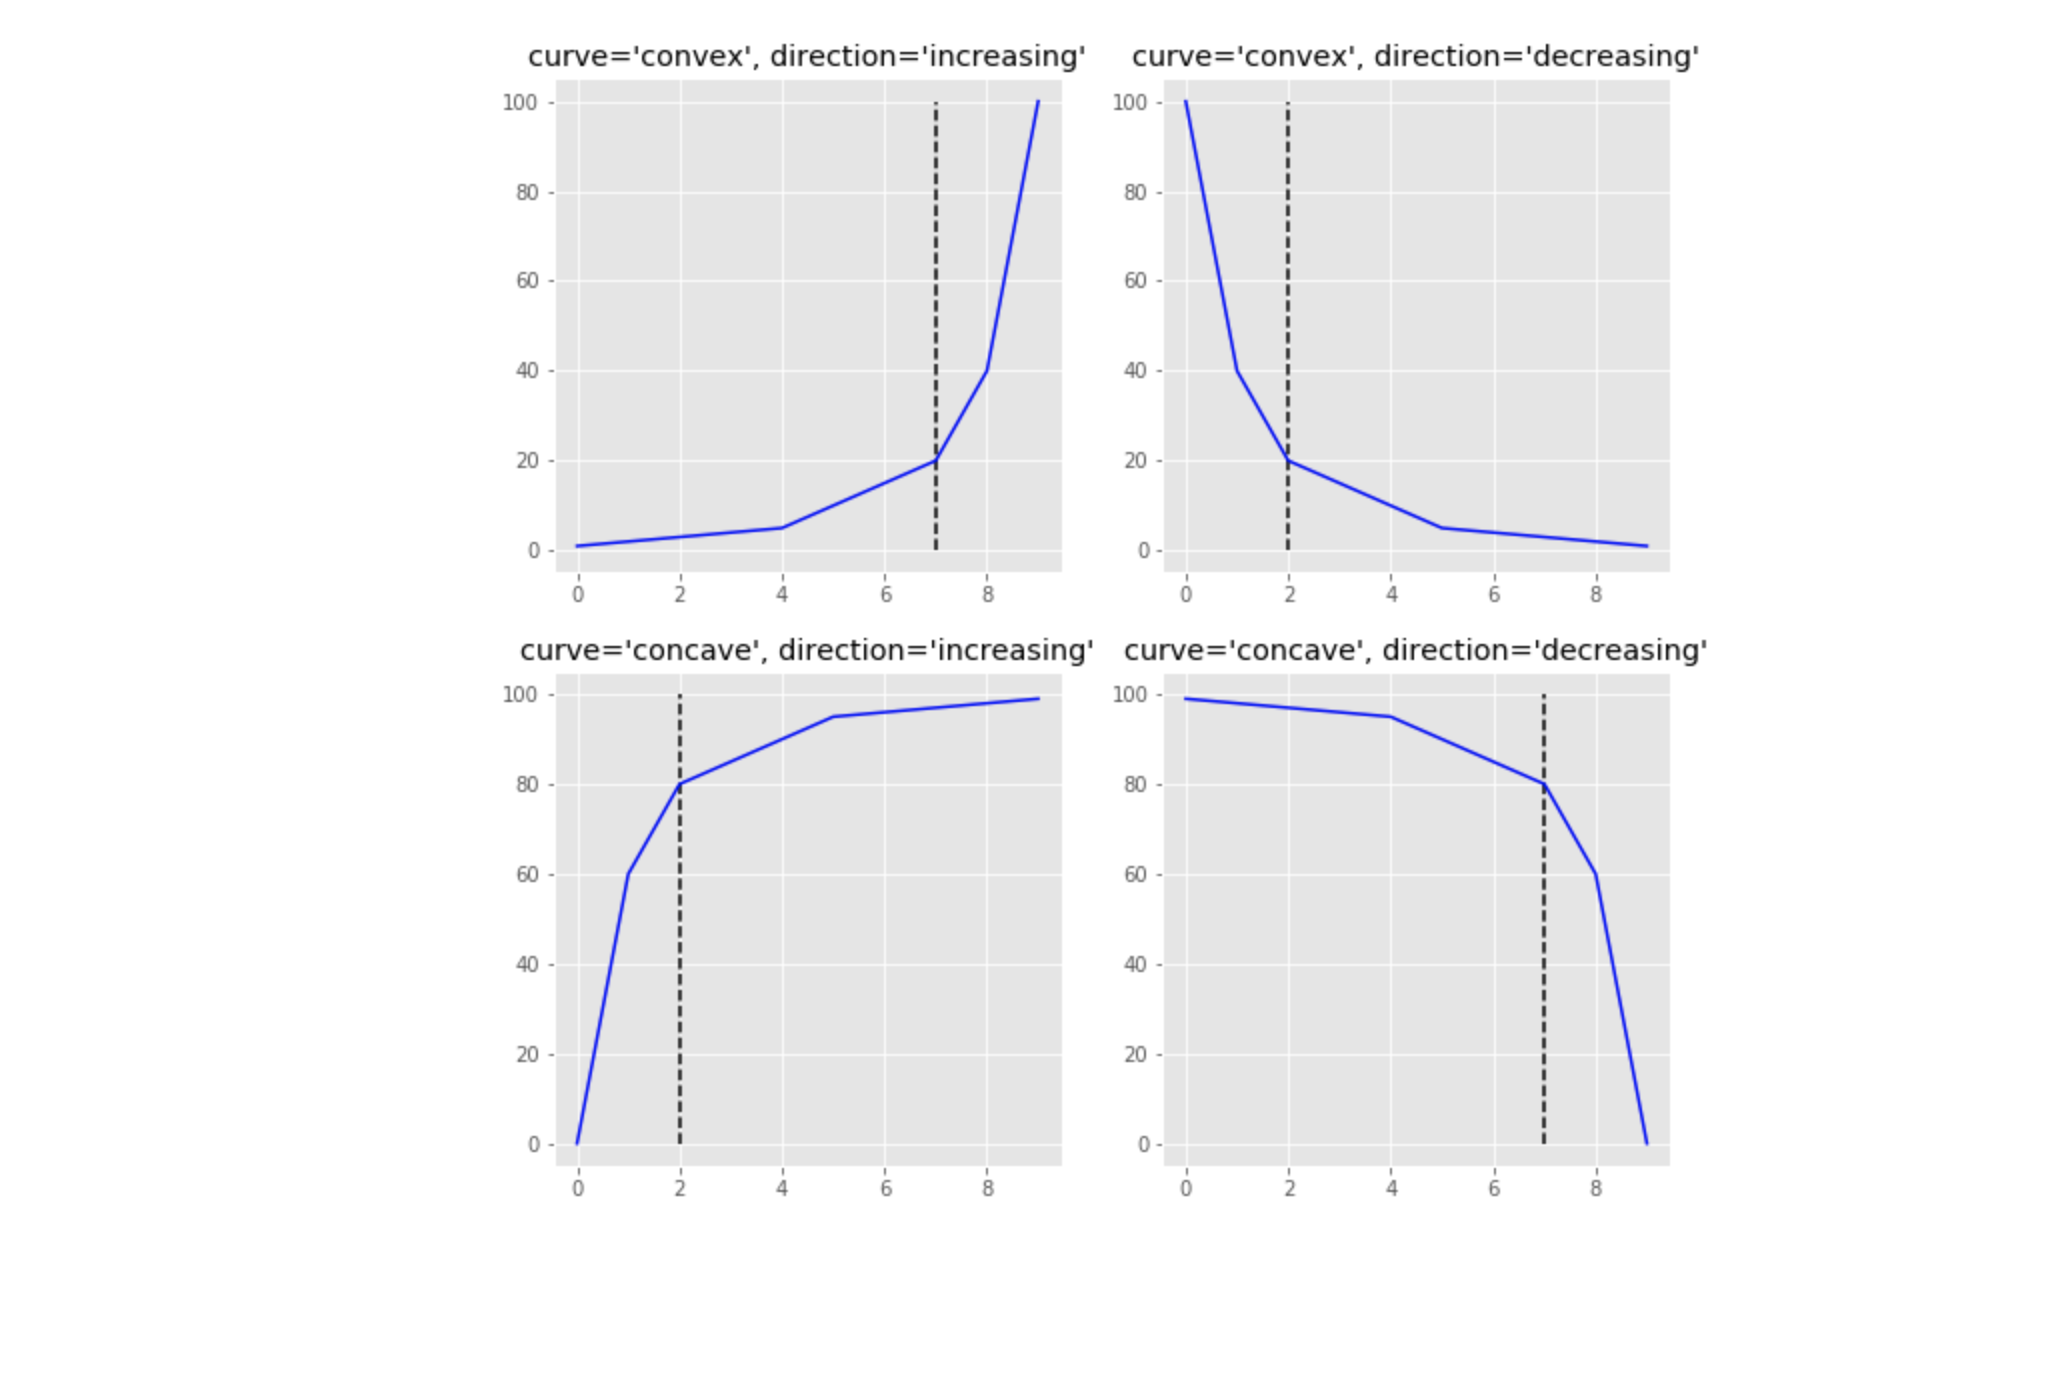

In [22]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# 아래 parameter를 참고하여 kneed 모듈을 사용하여 자동으로 elbow값을 찾아보세요.
from kneed import KneeLocator
"""
[KneeLocator parameter 참고]
curve (str) – If ‘concave’, algorithm will detect knees. If ‘convex’, it will detect elbows.
direction (str) – one of {“increasing”, “decreasing”}
"""
kneedle = KneeLocator(x=k_range, y=distortions, S=1.0, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

# 볼록 curve plot의 경우, 아래와 같이 knee를 찾습니다.
# print(round(kneedle.knee, 3))
# print(round(kneedle.knee_y, 3))

최적의 k : 3
최적의 k의 y값 : 62.679


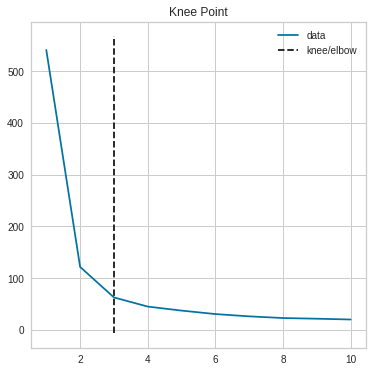

In [24]:
# kneed 모듈에서 간단한 plot 생성도 지원합니다.
kneedle.plot_knee()

### 문제 10. K-Means - 최적의 k 찾기 (Silhouette method).
: 최적의 k를 찾는 다른 방법으로, cluster내의 거리가 아닌 **cluster간의 거리**도 함께 고려한 계수를 사용해서 최적의 k를 비교해봅니다.

> "Silhouette method"란?  
: **cluster내의 거리와 cluster간의 거리**를 사용한 계수로 Silhouette coefficient(SC)값이 최대가 되는 k를 찾는 방법.


> SC 해석?  
: 각 cluster 사이의 거리가 멀고 cluster 내 데이터의 거리가 작을수록 군집 분석의 성능이 좋음.
Silhouette 값은 -1에서 1까지 가능하며, 0일 경우에는 cluster간의 변별력이 없다는 의미. -1에 가까울수록 clustering의 결과가 좋지 않음을 의미.


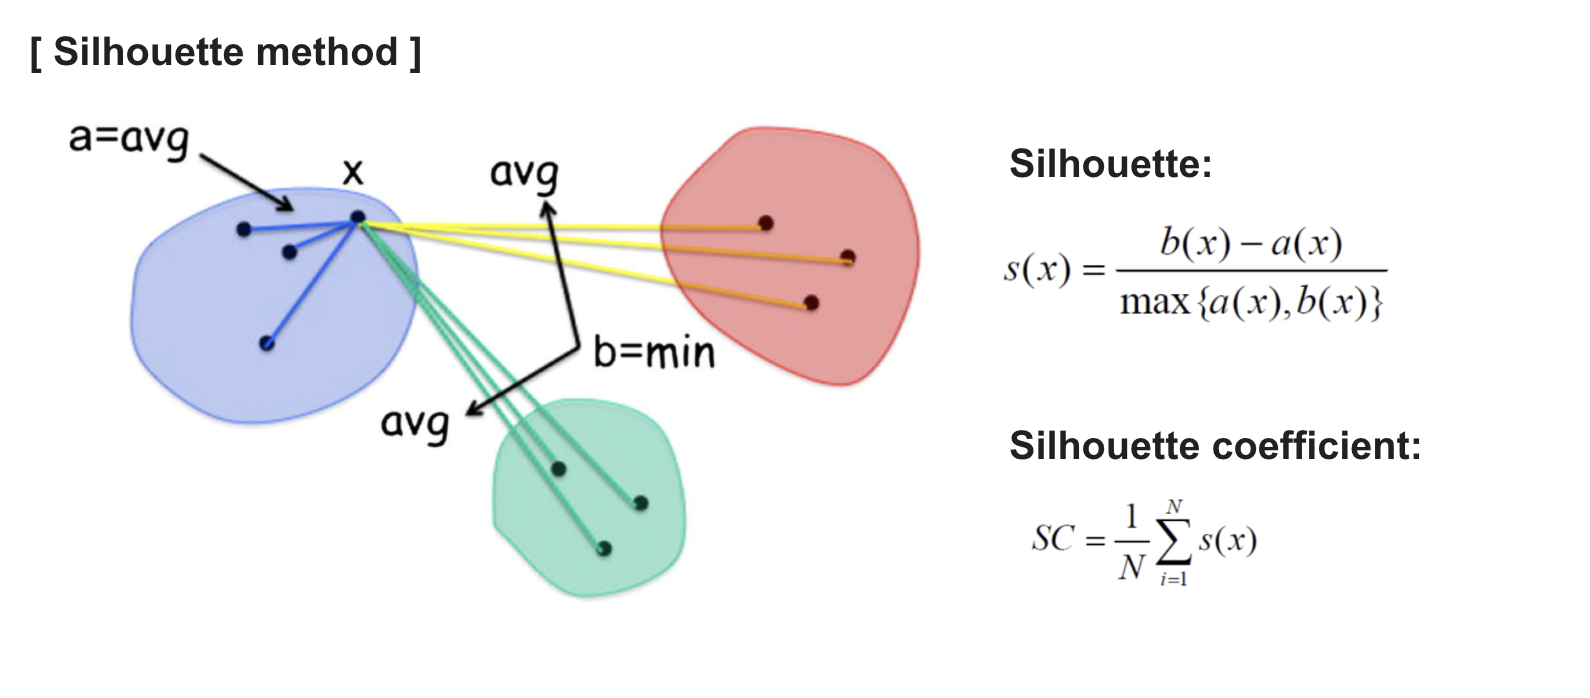

In [25]:
# silhouette_score 모듈을 사용해봅니다.
# [주의!] silhouette_score는 array 형태를 읽을 수 있습니다. 
# [주의!] 군집간의 거리 계산을 필요로 하기때문에, 최소 2개이상의 label/cluster가 있어야 합니다.
from sklearn.metrics import silhouette_score

silhouette_scores = [] 
k_range = range(2,11)
for i in k_range:
  km = KMeans(n_clusters = i)
  km.fit(train_x)
  label=km.predict(train_x)
  sc_value = silhouette_score(np.array(train_x), label, metric="euclidean", sample_size=None, random_state=None)
  silhouette_scores.append(sc_value)
  print(f'Silhouette score(n={i}): {sc_value}')


Silhouette score(n=2): 0.675545718829249
Silhouette score(n=3): 0.548032284056516
Silhouette score(n=4): 0.49292780221244153
Silhouette score(n=5): 0.4746894449701362
Silhouette score(n=6): 0.37530265028147
Silhouette score(n=7): 0.351821604883017
Silhouette score(n=8): 0.3649039225304948
Silhouette score(n=9): 0.3682367958075351
Silhouette score(n=10): 0.33154348138693474


In [26]:
# Silhouette method를 그래프를 통해 이해해 봅시다.
# x축이 k의 수, y축이 silhouette scores line plot을 그려봅시다.
fig = px.line(x=k_range, y=silhouette_scores, labels={"x":"k", "y":"Silhouette scores"})
fig.update_layout(width=800, height=500)
fig.show()

### 문제 11. Clustering : K-Means - 최적의 k 찾기 (SilhouetteVisualizer 사용해보기).
: KElbowVisualizer와 유사한 SilhouetteVisualizer를 사용해보고 Elbow method와는 다른 그래프를 해석하는 방법을 배워봅니다.
> silhouette score만 보는 것이 아닌, 그래프를 통해 각 군집의 분포를 종합적으로 평가합니다.


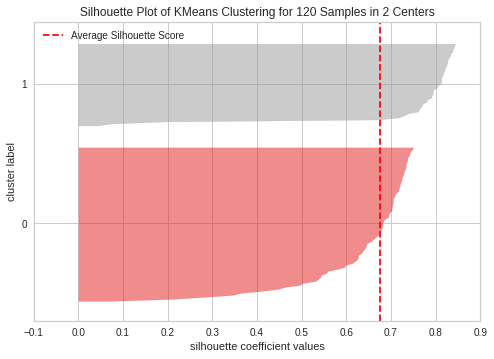

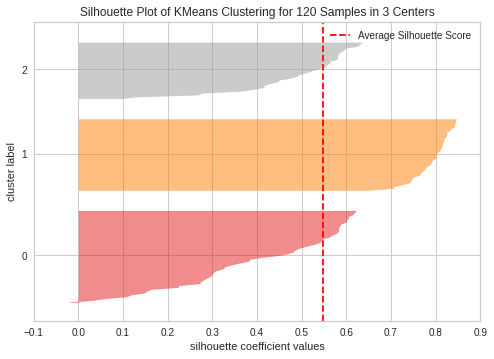

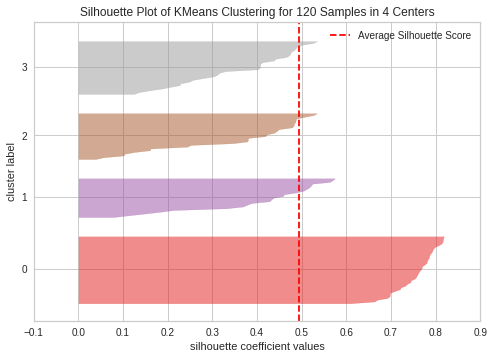

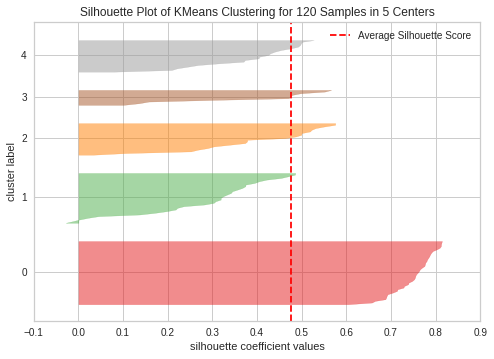

In [27]:
# SilhouetteVisualizer 사용해서 훈련(training)과 그래프를 한번에 해결해보세요.
from yellowbrick.cluster import SilhouetteVisualizer

# k의 범위를 지정해주세요.
# [주의!] 최소 2개이상의 label/cluster가 있어야 합니다.
k_range = range(2,6)
for i in k_range:
    km = KMeans(n_clusters=i, init="k-means++")
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(train_x)
    visualizer.poof()

### 문제 12. Clustering : K-Means - 최적의 k를 사용하여 모델 훈련시키기.  
: 위에서 구한 최적의 k를 사용하여 다시 모델을 훈련시켜봅니다.


In [28]:
# 위에서 찾은 최적을 k를 할당하고 k-means model 훈련을 시켜보세요.
k = 3
km = KMeans(n_clusters = k).fit(train_x)
train_cluster = km.labels_

### 문제 13. Clustering : K-Means - 훈련된 cluster를 그래프로 비교해보기.
: 훈련시킨 k-means model의 cluster 결과를 원래의 label과 비교해봅시다.

In [29]:
# 실제 label과 훈련된 결과 cluster를 그래프로 비교해보기.
# plotly에서 subplot을 만들기.
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"], 
               y=train_x["sepal_length"], 
               mode="markers",
               marker=dict(color=train_y),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"], 
               y=train_x["sepal_length"], 
               mode="markers",
               marker=dict(color=train_cluster),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()


In [30]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["petal_width"], 
               y=train_x["petal_length"], 
               mode="markers",
               marker=dict(color=train_y),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["petal_width"], 
               y=train_x["petal_length"], 
               mode="markers",
               marker=dict(color=train_cluster),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

### 문제 14: Clustering : K-Means - 훈련된 모델에 test set을 사용해 predict 하기.
: 위의 model이 잘 훈련되었다는 가정하에, test set을 사용하여 모델을 평가해봅시다.

In [31]:
# [문제 12]의 모델을 그대로 사용하여 prediction을 해보세요.
test_cluster = km.fit_predict(test_x)
print(test_cluster)
print(list(test_y))

[0 0 1 0 0 0 2 1 2 2 2 1 1 1 0 1 1 2 1 2 1 2 0 0 1 0 0 0 0 1]
[1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0]


In [32]:
# [문제 13]과 동일하게 그래프로 prediction결과를 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster-test"))

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"], 
               y=train_x["sepal_length"], 
               mode="markers",
               marker=dict(color=test_y),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"], 
               y=train_x["sepal_length"], 
               mode="markers",
               marker=dict(color=test_cluster),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [33]:
# [문제 13]과 동일하게 그래프로 prediction결과를 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster-test"))

fig.add_trace(
    go.Scatter(x=train_x["petal_width"], 
               y=train_x["petal_length"], 
               mode="markers",
               marker=dict(color=test_y),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["petal_width"], 
               y=train_x["petal_length"], 
               mode="markers",
               marker=dict(color=test_cluster),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

### 문제 15. Clustering : K-Means - clustering 결과를 수치적으로 평가하기.
: 다차원일수록 그래프를 통해 clustering 결과를 확인하기 어렵기 때문에, 객관적인 수치로 평가하는 방법이 필요합니다. 

In [34]:
# test set의 accuracy score을 구해서 k-means 모델을 평가해보세요.
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_y, train_cluster)
test_acc = accuracy_score(test_y, test_cluster)
print(f"Accuracy score of train set : {round(train_acc, 4)}")
print(f"Accuracy score of test set : {round(test_acc, 4)}")

Accuracy score of train set : 0.25
Accuracy score of test set : 0.2


### 문제 16. Clustering : K-Means - 실제 cluster명과 매칭해서 accuracy 확인하기.


In [35]:
# 실제 cluster명과 매칭해주는 함수를 만들어보세요.
# [참고] scipy.stats.mode()를 사용합니다.
import scipy

def find_matching_cluster(cluster_case, actual_labels, cluster_labels):
    matched_cluster={}
    actual_case = list(set(actual_labels))
    for i in cluster_case:
      idx = cluster_labels == i
      new_label=scipy.stats.mode(actual_labels[idx])[0][0]  # 동일한 위치의 label에서 가장 빈번한 cluster명을 찾아줍니다. (=mode)
      actual_case.remove(new_label)
      # 매칭되는 실제 label명을 dict형태로 저장.
      matched_cluster[i]=new_label
      print(f"훈련된 label명: {i} >> 가장 빈번한 실제 label명: {new_label}")
    return matched_cluster

In [36]:
km_train_case = list(set(train_cluster))
print(km_train_case)

[0, 1, 2]


In [37]:
# 위의 함수를 사용해 train set의 cluster명을 다시 확인해보세요.
train_perm_dict = find_matching_cluster(km_train_case, train_y, train_cluster)
print(list(train_y)[:10])
print(train_cluster[:10])
print(train_perm_dict)

훈련된 label명: 0 >> 가장 빈번한 실제 label명: 1
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 0
훈련된 label명: 2 >> 가장 빈번한 실제 label명: 2
[1, 1, 0, 2, 0, 0, 2, 0, 1, 1]
[0 0 1 2 1 1 2 1 0 0]
{0: 1, 1: 0, 2: 2}


In [38]:
# 동일한 방법으로 test set의 cluster명을 다시 확인해보세요.
km_test_case = list(set(test_cluster))
test_perm_dict = find_matching_cluster(km_test_case, test_y, test_cluster)
print(list(test_y)[:10])
print(test_cluster[:10])
print(test_perm_dict)

훈련된 label명: 0 >> 가장 빈번한 실제 label명: 1
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 0
훈련된 label명: 2 >> 가장 빈번한 실제 label명: 2
[1, 1, 0, 1, 2, 1, 2, 0, 2, 1]
[0 0 1 0 0 0 2 1 2 2]
{0: 1, 1: 0, 2: 2}


In [39]:
# 함수의 결과 리스트를 사용하며 cluster명을 다시 할당해 주세요.
train_new_labels = [train_perm_dict[label] for label in train_cluster]
test_new_labels = [test_perm_dict[label] for label in test_cluster]

In [40]:
# 새로 할당된 cluster명으로 다시 accuracy score를 계산하고 [문제 15]의 결과값과 비교해보세요.
train_acc = accuracy_score(train_y, train_new_labels)
test_acc = accuracy_score(test_y, test_new_labels)
print(f"Accuracy score of train set : {round(train_acc, 4)}")
print(f"Accuracy score of test set : {round(test_acc, 4)}")

Accuracy score of train set : 0.9167
Accuracy score of test set : 0.8


## Step3: Clustering : Agglomerative 알고리즘 (계층군집)
: 데이터 자체의 분포와 어떻게 grouping을 하고자 하는지에 따라 다른 알고리즘이 사용될 수 있습니다.


### Clustering : K-means VS Agglomerative 비교

```
[k-means 최적의 환경]
- 원형 혹은 구(spherical) 형태의 분포
- 동일한 데이터 분포 (size of cluster)
- 동일한 밀집도 (dense of cluster)
- 군집의 센터에 주로 밀집된 분포
- Noise와 outlier가 적은 분포
```

```   
[k-means의 민감성]
- Noise와 outlier에 민감함.  
- 처음 시작하는 점에 따라 결과에 영향을 줌.  
- k값을 직접 설정해야하는 어려움이 있음.
```


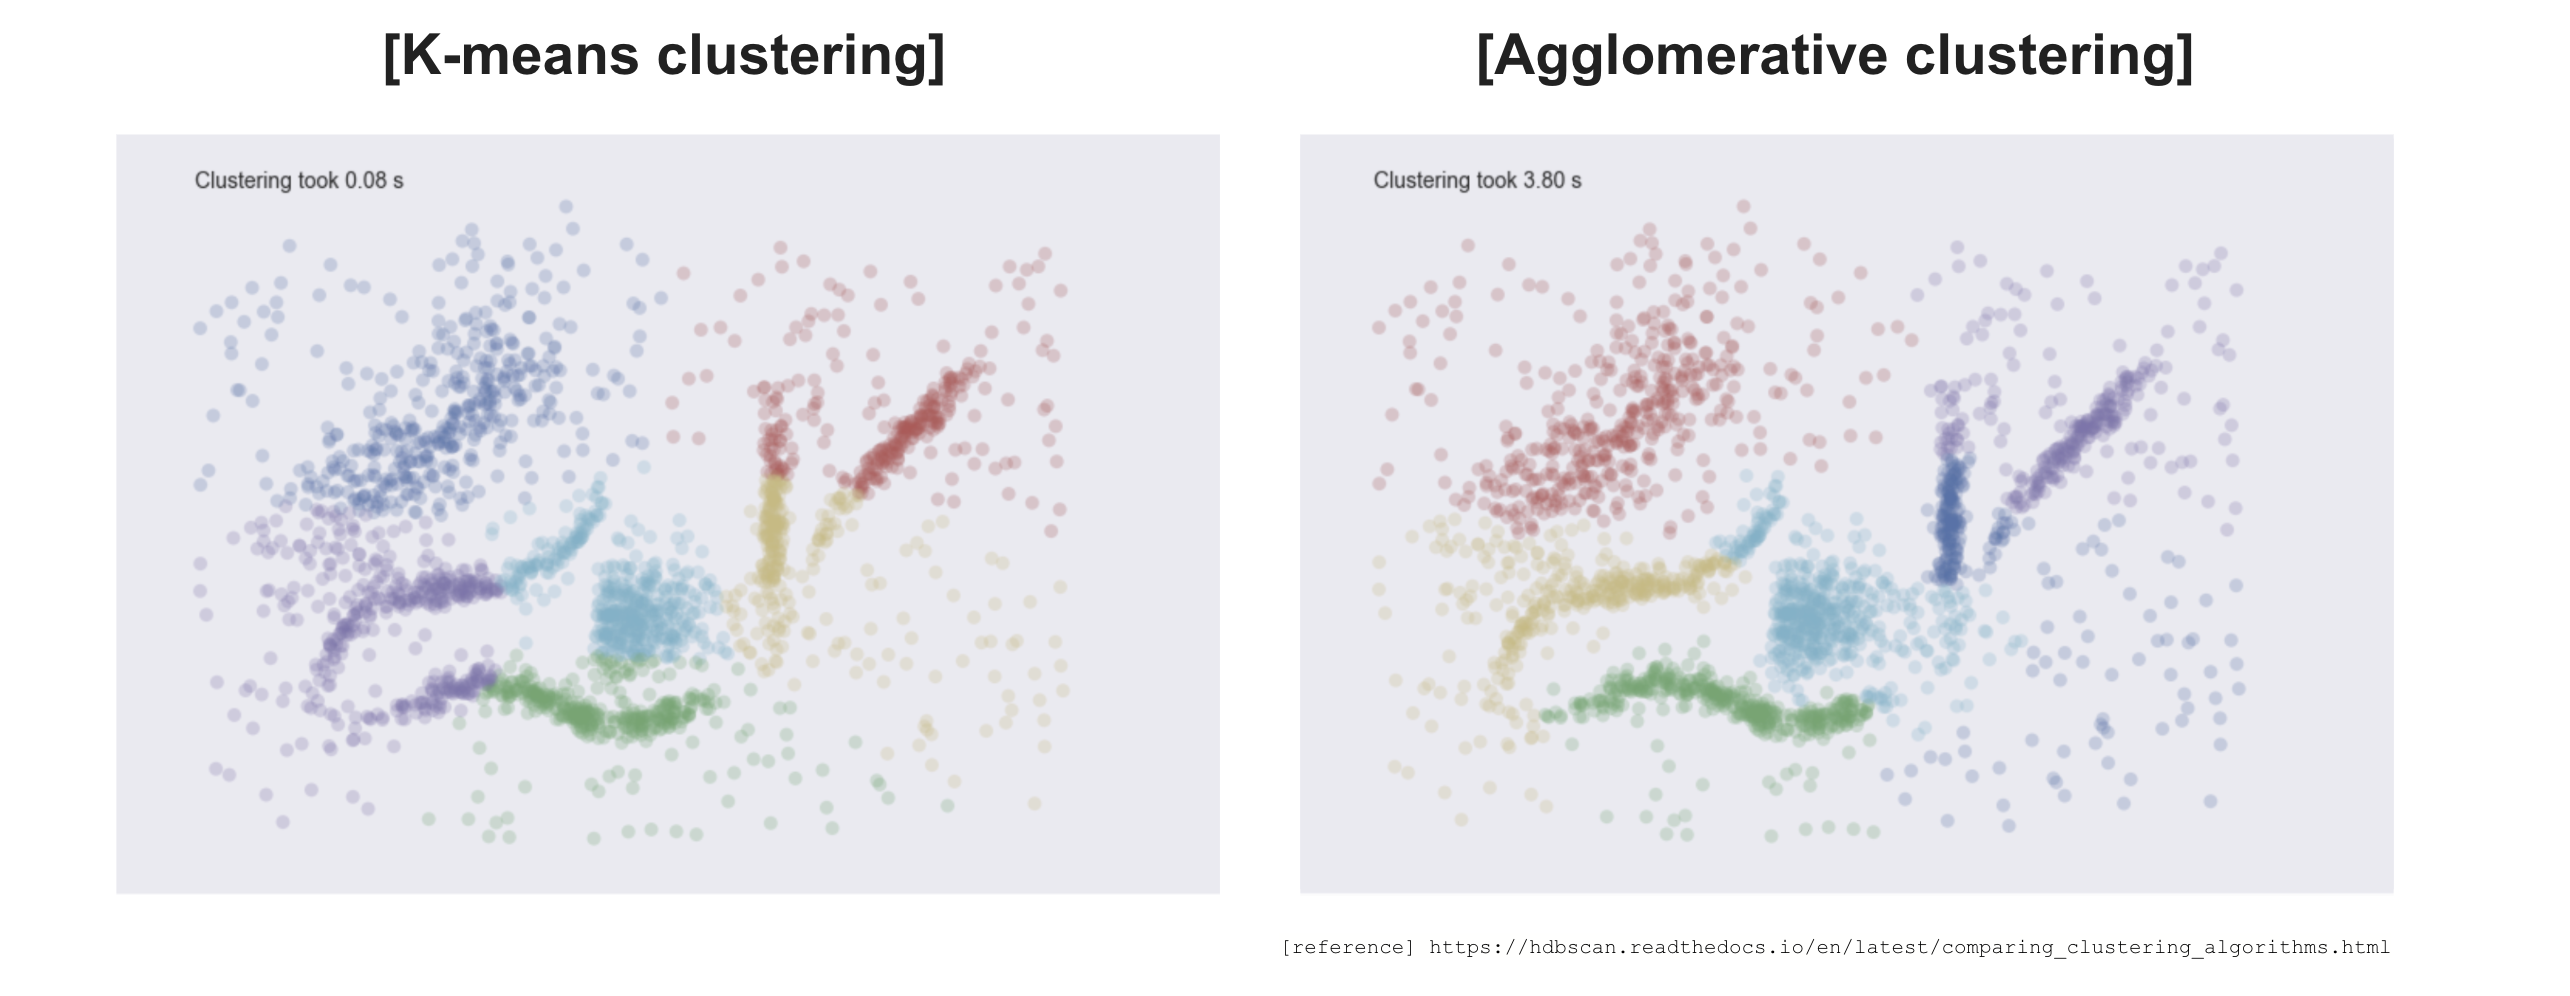

### 문제 17. Clustering : Agglomerative - Agglomerative 모듈 탐색&훈련시키기.  
: k-means의 disadvantage를 보완할 수 있는 Agglomerative 알고리즘을 훈련시켜봅니다.

[sklearn에서 제공하는 모듈 파라미터 상세보기>>](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)


In [41]:
# Agglomerative 모듈 import 
from sklearn.cluster import AgglomerativeClustering
# help(AgglomerativeClustering)

```
[AgglomerativeClustering 파라미터 참고사항]
- linkage 종류 : {‘ward’, ‘complete’, ‘average’, ‘single’}
- linkage="ward"이면, affinity="euclidean"만 가능.
- distance_threshold!=None 이면, n_clusters=None 이어야함.
- distance_threshold!=None 이면, compute_full_tree=True 이어야함.
```

In [42]:
# 자주 사용되는 parameter를 사용하여, Agglomerative를 훈련시켜보세요.
# 파라미터 설정 시, 상단의 '참고사항' 부분을 확인해주세요.
# linkage="ward"
aggl = AgglomerativeClustering(n_clusters=3, linkage="ward", affinity="euclidean").fit(train_x)
aggl

AgglomerativeClustering(n_clusters=3)

### 문제 18. Clustering : Agglomerative - 훈련된 cluster를 그래프로 비교해보기.

In [43]:
# 훈련된 label을 변수에 저장하세요.
aggl_labels = aggl.labels_

# 원래의 label과 Agglomerative 알고리즘 결과를 시각화로 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"], 
               y=train_x["sepal_length"], 
               mode="markers",
               marker=dict(color=train_y),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"], 
               y=train_x["sepal_length"], 
               mode="markers",
               marker=dict(color=aggl_labels),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

In [44]:
# 원래의 label과 Agglomerative 알고리즘 결과를 시각화로 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=train_x["petal_width"], 
               y=train_x["petal_length"], 
               mode="markers",
               marker=dict(color=train_y),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["petal_width"], 
               y=train_x["petal_length"], 
               mode="markers",
               marker=dict(color=aggl_labels),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

### 문제 19. Clustering : Agglomerative - clustering 결과를 수치적으로 평가하기.

In [45]:
# [문제 16]과 동일한 방법으로, cluster명을 매칭시켜보세요.
# label 종류를 저장하세요.
aggl_case = list(set(aggl_labels))
print(aggl_case)
# find_matching_cluster 함수를 사용해서 매칭되는 dictionary를 생성하세요.
aggl_perm_dict = find_matching_cluster(aggl_case, train_y, aggl_labels)
print(aggl_perm_dict)
# 생성한 dict 변수를 사용하여 훈련된 결과 label을 변경해주세요.
aggl_new_labels = [aggl_perm_dict[label] for label in aggl_labels]


[0, 1, 2]
훈련된 label명: 0 >> 가장 빈번한 실제 label명: 1
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 0
훈련된 label명: 2 >> 가장 빈번한 실제 label명: 2
{0: 1, 1: 0, 2: 2}


In [46]:
# 새로 할당된 cluster명으로 다시 accuracy score를 계산하고 [문제16]의 k-means 결과값과 비교해보세요.
# accuracy score은 k-means의 시작점과 train/test 분류의 영향으로 매번 상이하게 나올수 있습니다..
aggl_acc = accuracy_score(train_y, aggl_new_labels)
print(f"Accuracy score of K-means : {round(train_acc, 4)}")
print(f"Accuracy score of Agglomerative : {round(aggl_acc, 4)}")


Accuracy score of K-means : 0.9167
Accuracy score of Agglomerative : 0.8917


### 문제 20. Clustering : Agglomerative - dendrogram을 그리기 위한 linkage matrix 구성 이해하기.

[scipy의 dendrogram 파라미터 상세보기 >>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram)

In [47]:
# dendrogram을 그리기 위한 matplotlib와 scipy의 dendrogram import.
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


In [48]:
# 샘플 데이터를 통해 linkage matrix 구조를 파악해봅시다.
sample_arr = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
sample_arr


[[2], [8], [0], [4], [1], [9], [9], [0]]

In [49]:
# 샘플 데이터로 linkage matrix를 생성해보세요.
sample_linkage = linkage(sample_arr, "single")
print(sample_linkage)

[[ 2.  7.  0.  2.]
 [ 5.  6.  0.  2.]
 [ 0.  4.  1.  2.]
 [ 8. 10.  1.  4.]
 [ 1.  9.  1.  3.]
 [ 3. 11.  2.  5.]
 [12. 13.  4.  8.]]


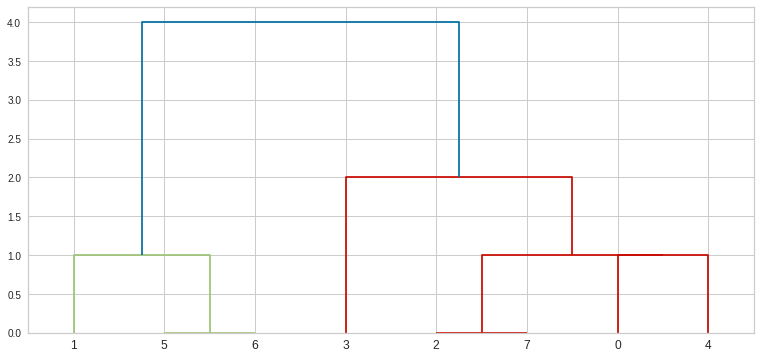

In [50]:
# linkage matrix를 사용해서 dendrogram을 그려보세요.
fig = plt.figure(figsize=(13, 6))
dn = dendrogram(sample_linkage)
plt.show()

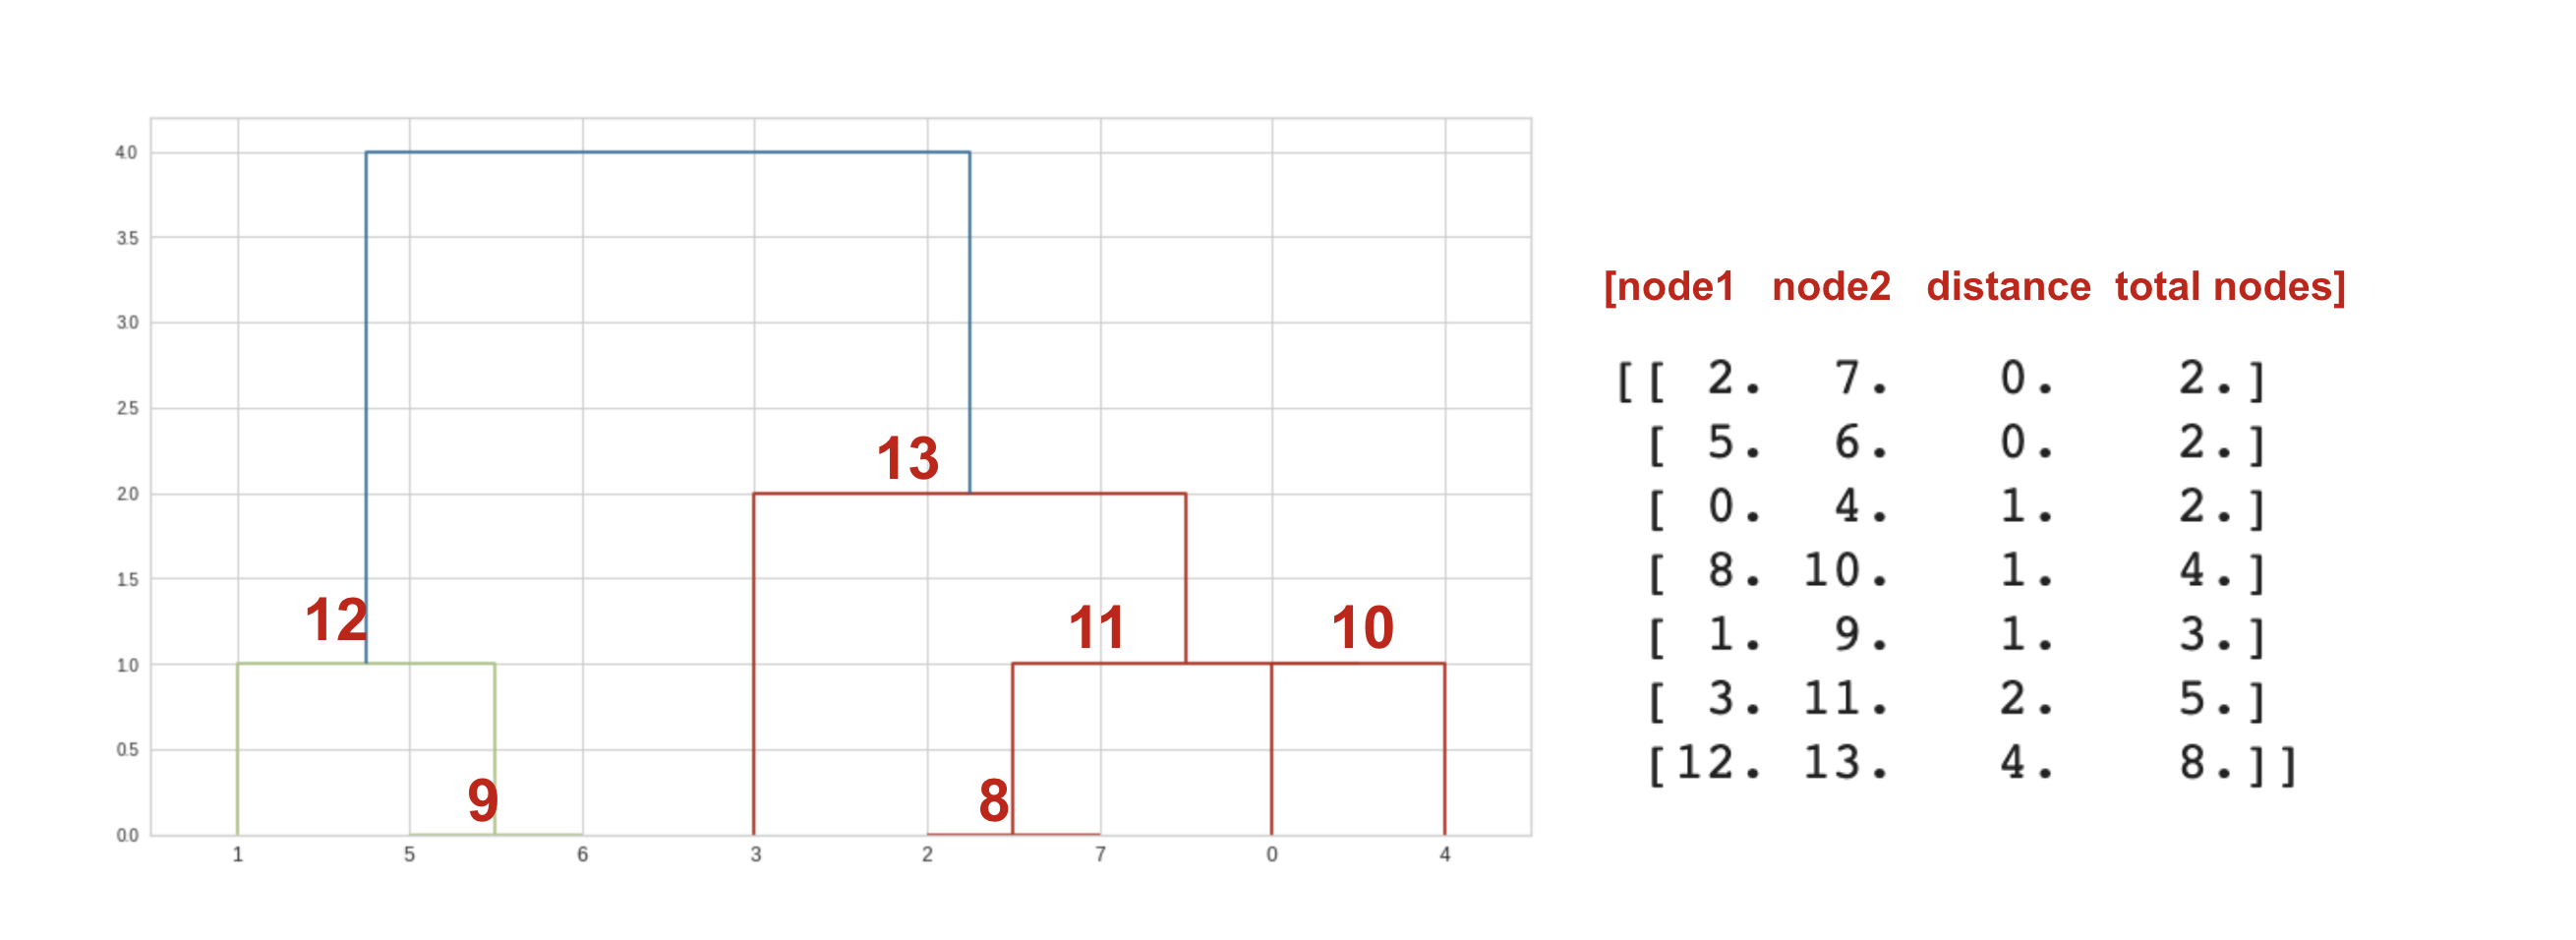

### 문제 21. Clustering : Agglomerative - dendrogram을 통해 알고리즘 이해하기.

In [51]:
# linkage_matrix를 생성하는 함수를 만들어보세요.
# [참고] model.children_, model.labels_, model.distances_ 를 활용하세요.
# [참고] dendrogram을 만들기위해 어떤 형태의 데이터가 필요한지 확인하세요.

def create_linkage(model):
  # 각 노드에 총 point수를 계산하기.
  counts = np.zeros(model.children_.shape[0]) # children 길이만큼 0 채운 array.
  n_samples = len(model.labels_) # 각 point의 cluster label.
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
  return linkage_matrix
 

In [52]:
# Dendrogram을 그리기 위해서는 distance_threshold와 n_clusters 파라미터 조정이 필요합니다.
# distance_threshold=0, n_clusters=None
aggl_dend = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(train_x)


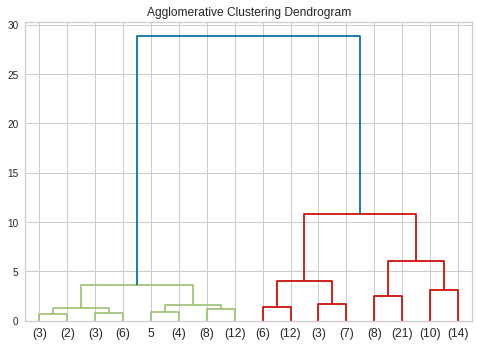

In [53]:
# create_linkage 함수를 사용해서 linkage matrix를 생성하고, dendrogram을 그려보세요.
# x축 - 실제 point(혹은 각 노드에 포함되는 point수)
plt.title('Agglomerative Clustering Dendrogram')
linkage_matrix = create_linkage(aggl_dend)
dendrogram(linkage_matrix, truncate_mode="level", p=3)
plt.show()


In [54]:
# dendrogram에서 정한 cluster 수로 모델을 훈련시켜보세요.
aggl = AgglomerativeClustering(n_clusters=4, linkage="ward", affinity="euclidean").fit(train_x)
aggl

AgglomerativeClustering(n_clusters=4)

In [55]:
# 훈련된 label을 변수에 저장하세요.
aggl_labels = aggl.labels_

# 원래의 label과 Agglomerative 알고리즘 결과를 시각화로 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"], 
               y=train_x["sepal_length"], 
               mode="markers",
               marker=dict(color=train_y),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"], 
               y=train_x["sepal_length"], 
               mode="markers",
               marker=dict(color=aggl_labels),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

In [56]:
# 원래의 label과 Agglomerative 알고리즘 결과를 시각화로 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=train_x["petal_width"], 
               y=train_x["petal_length"], 
               mode="markers",
               marker=dict(color=train_y),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["petal_width"], 
               y=train_x["petal_length"], 
               mode="markers",
               marker=dict(color=aggl_labels),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

### [참고] Clustering : Agglomerative - 언제 사용해야하나요? 


```
[Hierarchical clustering의 장단점]
- cluster수(k)를 정하지 않아도 사용가능.
- random point에서 시작하지 않으므로, 동일한 결과가 나옴.
- dendrogram을 통해 전체적인 군집을 확인할 수 있음 (nested clusters).

- 대용량 데이터에 비효율적임 (계산이 많음).

-> 샘플 데이터로 가볍게 군집분포를 확인하거나 nested clusters를 확인하기에 유용함.
-> 뒤에 배울 HDBSCAN의 기초지식.
```

## Step4: Clustering : DBSCAN 알고리즘

### Clustering : DBSCAN - DBSCAN 알고리즘 기초파악.

 DBSCAN 알고리즘 (density-based spatial clustering of applications with noise) 
 : 

 ```
[DBSCAN 장점]
- K-means와 달리 최초 k(군집수)를 직접 할당하지 않음.
- Density(밀도)에 따라서 군집을 나누기 때문에, 기하학적인 모양을 갖는 분포도 적용 가능.
- Oulier 구분이 가능함.

 ```

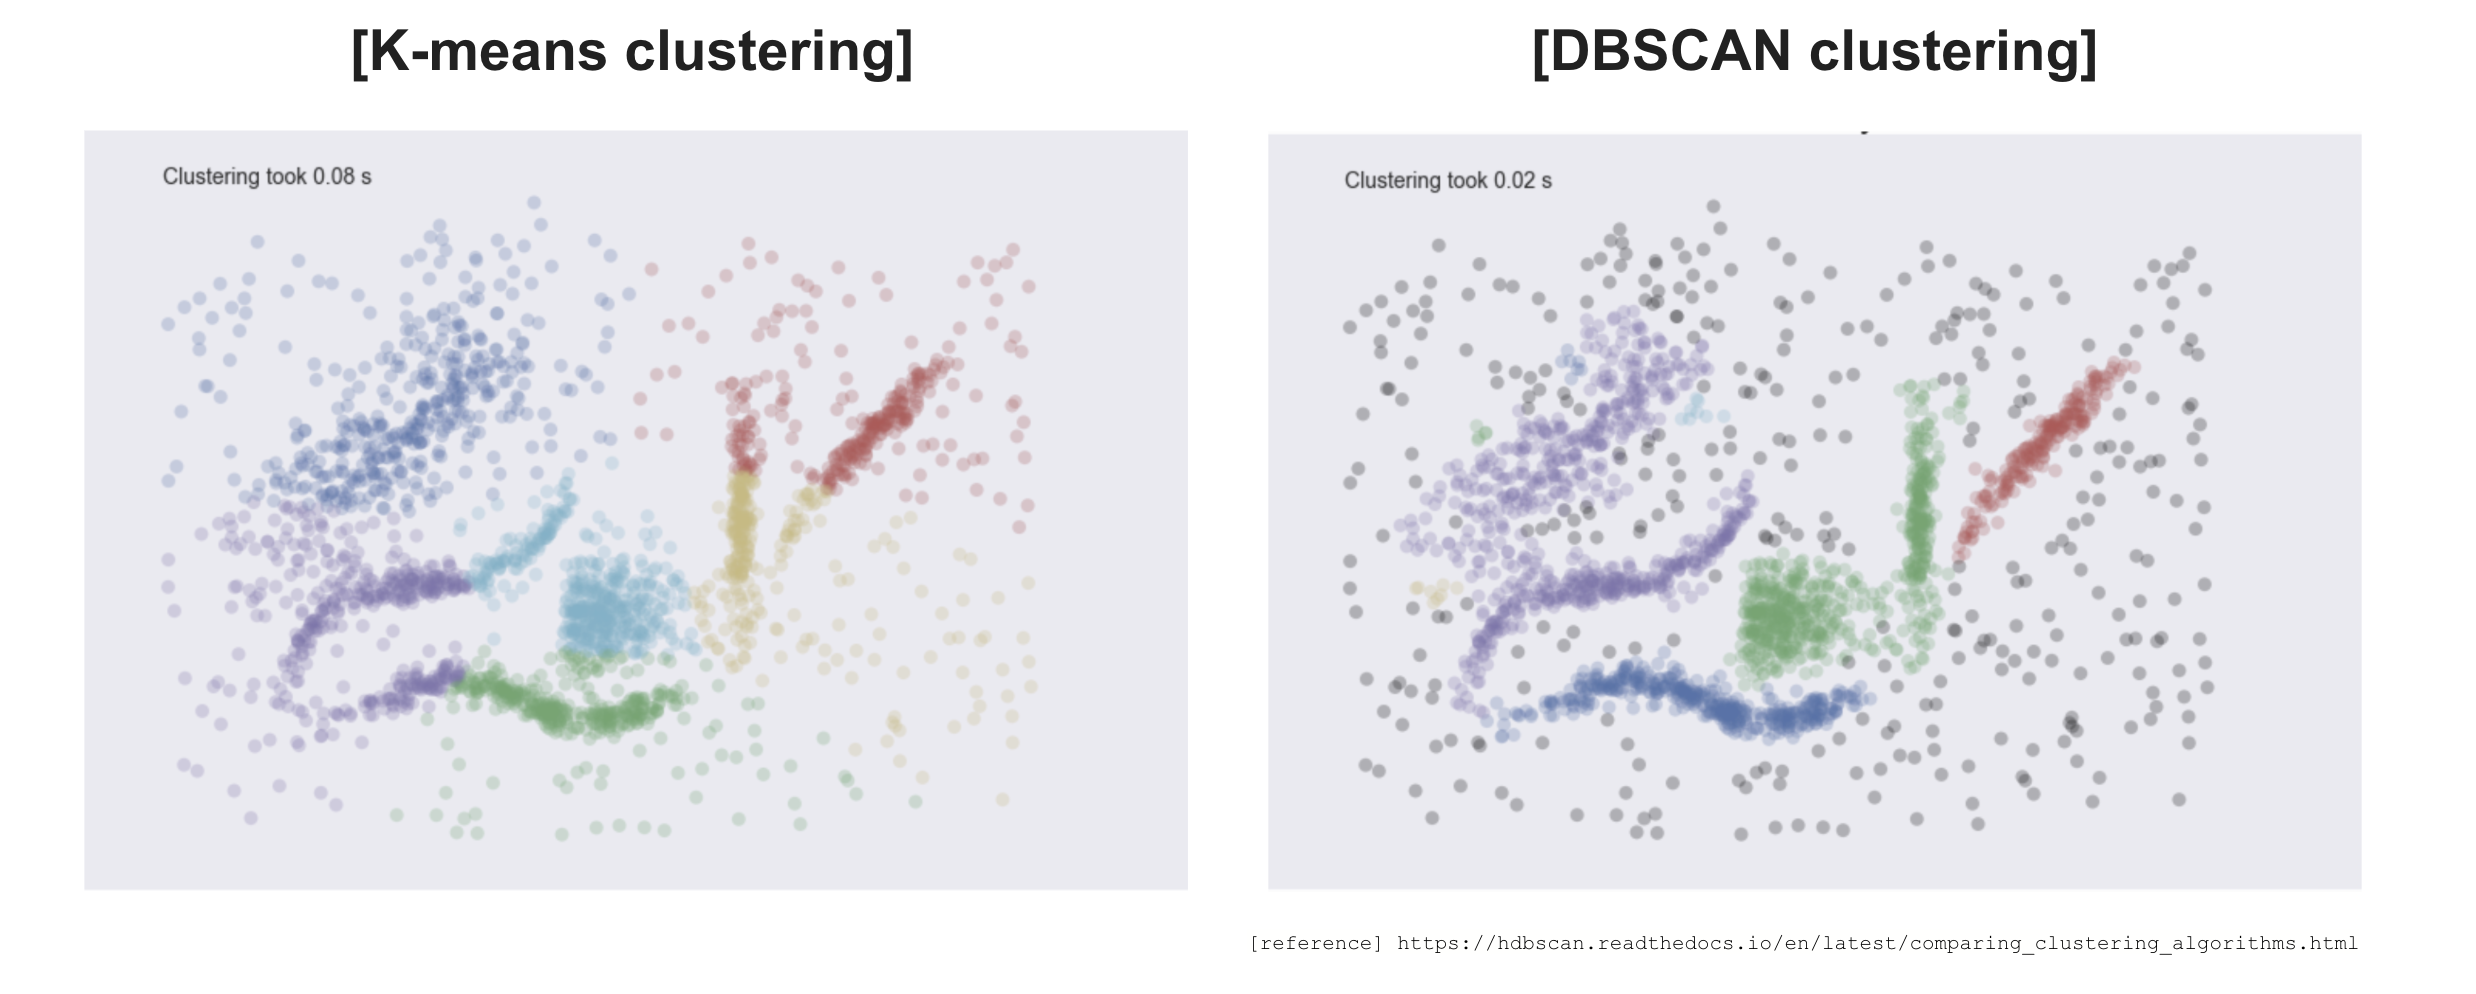

### 문제 22. Clustering : DBSCAN - 비구형(nonspherical) 데이터 생성하기.  

In [57]:
# make_moons를 이용하여 DBSCAN 알고리즘을 적용시킬 비구형분포 데이터를 생성해보세요.
from sklearn.datasets import make_moons

# 샘플수와 noise정도 등의 파라미터를 입력할 수 있습니다.
moon_data, moon_labels = make_moons(n_samples=400, noise=0.1, random_state=42)
moon_data[:5]

array([[-0.04405185,  0.43607778],
       [ 0.69223045, -0.40111946],
       [ 0.8281978 ,  0.54152189],
       [ 0.17881243,  0.26886231],
       [ 0.0917154 ,  0.94611799]])

In [58]:
# array 형태의 데이터를 Dataframe 형태로 변경해주세요.
moon_data_df = pd.DataFrame(moon_data, columns=["x", "y"])
moon_data_df["label"] = moon_labels
moon_data_df.head()

x         y  label
0 -0.044052  0.436078      1
1  0.692230 -0.401119      1
2  0.828198  0.541522      0
3  0.178812  0.268862      1
4  0.091715  0.946118      0

In [59]:
# scatter plot에 target컬럼 색으로 데이터를 나타내보세요.
fig = px.scatter(moon_data_df, x="x", y="y", color="label")
fig.update_layout(width=600, height=500)
fig.show()


### 문제 23. Clustering : DBSCAN - DBSCAN 알고리즘 탐색하기.
: 사용할 모듈을 import 하고, DBSCAN 알고리즘의 파라미터를 살펴봅니다. 

[Parameters]
```
- eps(epsilon): 기준점부터의 반경. 
- min_samples: 반경내 있어야할 최소 data points.
```

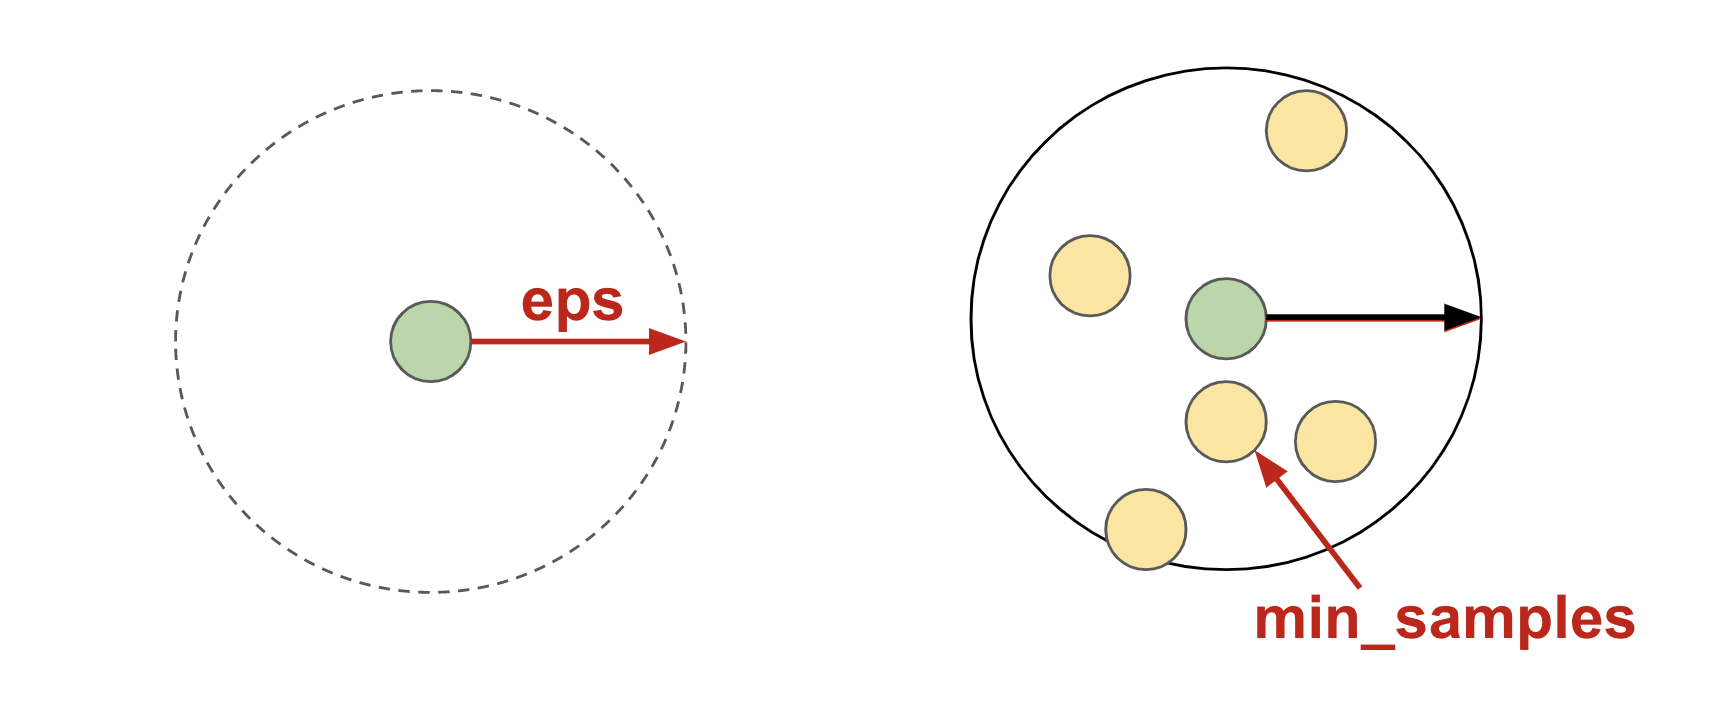

[Points]
```
- Core point
- Border point
- Outlier/Noise point
```

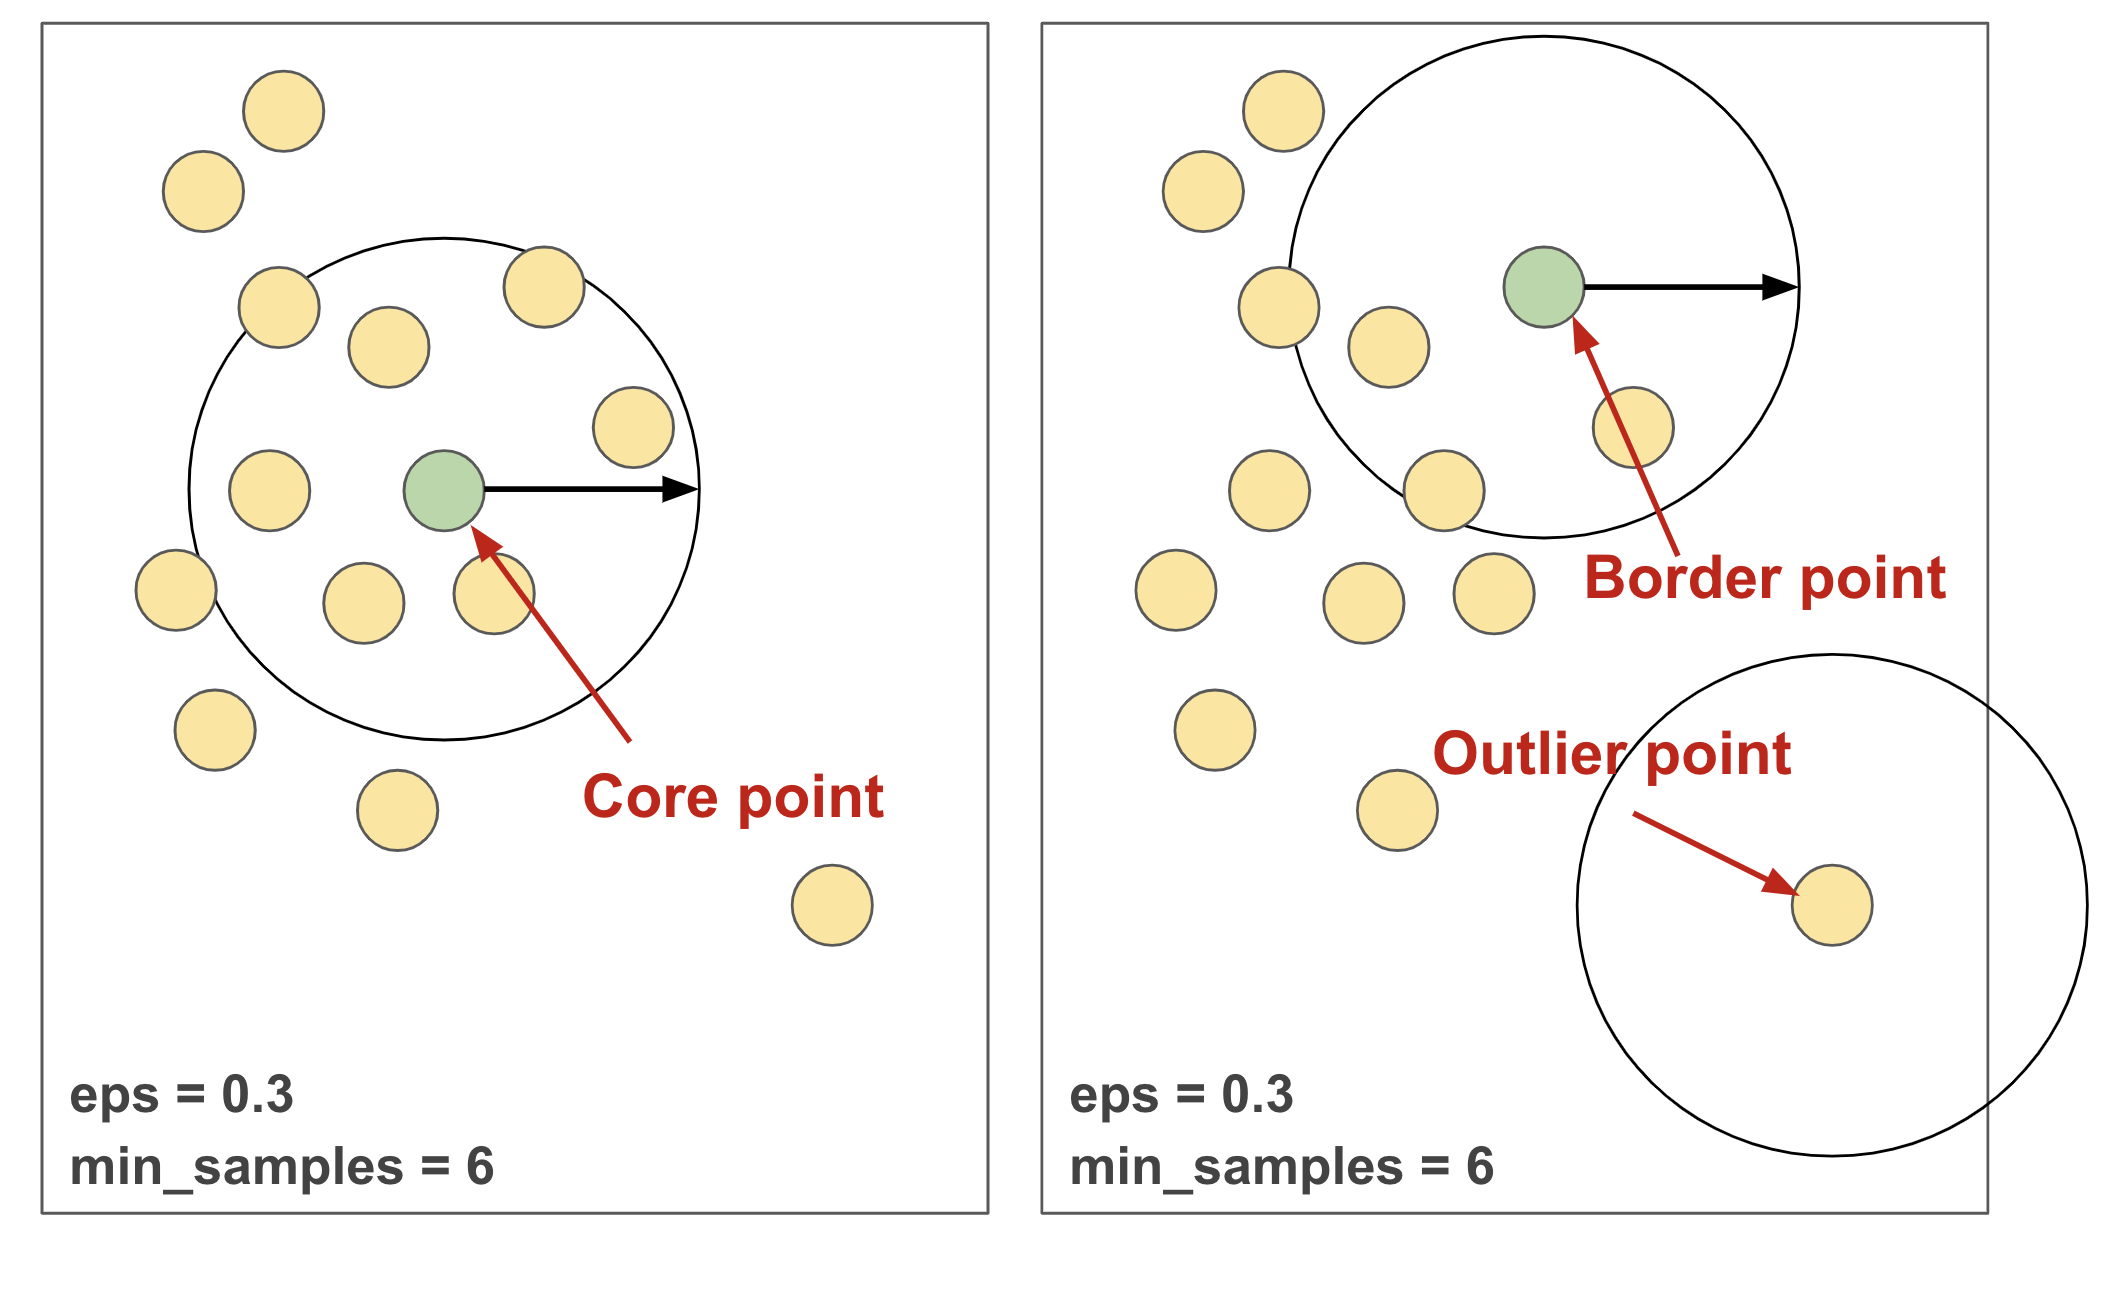

In [60]:
# DBSCAN 모듈을 import 합니다.
from sklearn.cluster import DBSCAN
# help(DBSCAN)


### 문제 24. Clustering : DBSCAN - DBSCAN 알고리즘 훈련시키기.

In [61]:
# DBSCAN의 대표적인 파라미터인 eps(radius of neighborhood)와 min_samples(minimun number of data points)를 설정해봅시다.
# eps=0.2, min_samples=6
dbscan = DBSCAN(eps=0.2, min_samples=6)


In [62]:
# 위문제에서 생성한 moon_data를 훈련시켜보세요.
dbscan.fit(moon_data)

DBSCAN(eps=0.2, min_samples=6)

In [63]:
# 훈련된 결과 label을 확인해보세요.
dbscan_label = dbscan.labels_
dbscan_label[:10]
# 분류된 label의 총 갯수를 확인해보세요.
set(dbscan_label) 

{-1, 0, 1}

### 문제 25. Clustering : DBSCAN - DBSCAN 알고리즘 파라미터 비교하기.
: 시각화를 통해 훈련된 모델의 결과를 확인하고, 파라미터를 변경하여 비교해보세요.

In [64]:
# 위의 결과를 plotly를 사용하여 시각화로 나타내보세요.
moon_data_df["dbscan_label"] = dbscan_label

fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
fig.update_layout(width=600, height=500)
fig.show()

In [65]:
# eps 파라미터가 0.1, 0.2, 0.5일때 clusters의 차이를 비교해보세요.

for eps in [0.1, 0.2, 0.5]:
  dbscan = DBSCAN(eps=eps, min_samples=6).fit(moon_data)
  dbscan_label = dbscan.labels_
  print(f"eps:{eps} ->> label수: {len(set(dbscan_label))}")
  moon_data_df["dbscan_label"] = dbscan_label
  fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
  fig.update_layout(width=600, height=500)
  fig.show()

eps:0.1 ->> label수: 19


eps:0.2 ->> label수: 3


eps:0.5 ->> label수: 1


In [66]:
# min_samples 파라미터가 2, 6, 30 일때 clusters의 차이를 비교해보세요.

for min_samples in [2, 6, 30]:
  dbscan = DBSCAN(eps=0.2, min_samples=min_samples).fit(moon_data)
  dbscan_label = dbscan.labels_
  print(f"min_samples:{min_samples} ->> label수: {len(set(dbscan_label))}")
  moon_data_df["dbscan_label"] = dbscan_label
  fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
  fig.update_layout(width=600, height=500)
  fig.show()

min_samples:2 ->> label수: 3


min_samples:6 ->> label수: 3


min_samples:30 ->> label수: 1


### 문제 26. Clustering : DBSCAN - DBSCAN와 K-means의 성능 비교하기.

In [67]:
# 2개의 그룹으로 k-means를 훈련시켜보세요.
moon_km = KMeans(n_clusters = 2).fit(moon_data)
moon_km

KMeans(n_clusters=2)

In [68]:
# [문제 6]와 같이 실제 label과 훈련된 label을 비교해보세요.
compare_kmeans_clusters = dict(zip(moon_km.labels_, moon_labels))
print(compare_kmeans_clusters)

{0: 0, 1: 1}


In [69]:
# k-means 결과를 plotly를 사용하여 시각화로 나타내고, dbscan의 결과와 비교해보세요.
moon_data_df["kmeans_label"] = moon_km.labels_
moon_data_df["kmeans_label"] = moon_data_df["kmeans_label"].astype(str)

moon_dbscan = DBSCAN(eps=0.2, min_samples=6).fit(moon_data)
moon_data_df["dbscan_label"] = moon_dbscan.labels_
moon_data_df["dbscan_label"] = moon_data_df["dbscan_label"].astype(str)

for label_case in ["dbscan_label", "kmeans_label"]:
  fig = px.scatter(moon_data_df, x="x", y="y", color=label_case)
  fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
  fig.show()

### 문제 27. Clustering : DBSCAN - clustering 결과를 수치적으로 평가하기.

In [70]:
# 문제 15, 16과 같이, k-means 결과와 dbscan의 결과를 수치적으로 비교해보세요.
# 아래 수정된 "find_matching_cluster" 함수를 사용하여, DBSCAN 훈련결과 cluster명을 다시 확인해보세요.
# [참고] k를 정하지 않는 DBSCAN의 경우, label case 수가 다름을 감안해야합니다!

def find_matching_cluster(cluster_case, actual_labels, cluster_labels):
    matched_cluster={}
    temp_labels = [i+100 for i in range(100)]
    actual_case = list(set(actual_labels))
    for i in cluster_case:
      if len(actual_case) > 0:
        idx = cluster_labels == i
        new_label=scipy.stats.mode(actual_labels[idx])[0][0]  # 동일한 위치의 label에서 가장 빈번한 cluster명을 찾아줍니다. (=mode)
        print(actual_case, "-", new_label)
        if new_label in actual_case: 
          actual_case.remove(new_label)
        else: 
          new_label=temp_labels[new_label]
          temp_labels.remove(new_label)
        # 매칭되는 실제 label명을 dict형태로 저장.
        matched_cluster[i]=new_label
      else: 
        new_label=None
      print(f"훈련된 label명: {i} >> 가장 빈번한 실제 label명: {new_label}")
    return matched_cluster

In [71]:
# 훈련된 dbscan label을 데이터가 많은 순서로 정렬해봅시다.
dbscan_labels = moon_dbscan.labels_
dbscan_case_dict = dict((x,list(dbscan_labels).count(x)) for x in set(dbscan_labels))
sorted_dbscan_case = sorted(dbscan_case_dict, key=dbscan_case_dict.get, reverse=True)
print(sorted_dbscan_case)

[1, 0, -1]


In [72]:
dbscan_perm_dict = find_matching_cluster(sorted_dbscan_case, moon_labels, dbscan_labels)
dbscan_perm_dict

[0, 1] - 0
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 0
[1] - 1
훈련된 label명: 0 >> 가장 빈번한 실제 label명: 1
훈련된 label명: -1 >> 가장 빈번한 실제 label명: None


{0: 1, 1: 0}

In [73]:
# 훈련된 label명과 실제 label명이 매칭되는 경우 >> 새로 매칭된 label명으로 변경.
# 훈련된 label명과 실제 label명이 매칭되지 않는 경우 >> 훈련된 label명 유지.
dbscan_new_labels = [label if label not in dbscan_perm_dict else dbscan_perm_dict[label] for label in dbscan_labels]
print(np.array(dbscan_new_labels[:80]))
print(dbscan_labels[:80])


[ 1  1  0  1  0  0  1  0  1  0  0  1  0  0  0  0  1  1  1  1  0  0  1  1
  0  1  0  1  1  0  1  0  1  0  1  0  0  1  0  0  1  0  0  0  0  1  0  0
  0  0  0  1  1  0  1  0  1  0  0  0  0  1  1  0  0  0  1  1 -1  0  1  0
  0  0  1  1  1  1  0  1]
[ 0  0  1  0  1  1  0  1  0  1  1  0  1  1  1  1  0  0  0  0  1  1  0  0
  1  0  1  0  0  1  0  1  0  1  0  1  1  0  1  1  0  1  1  1  1  0  1  1
  1  1  1  0  0  1  0  1  0  1  1  1  1  0  0  1  1  1  0  0 -1  1  0  1
  1  1  0  0  0  0  1  0]


In [74]:
kmean_labels = moon_km.labels_
km_case = list(set(kmean_labels))
kmean_perm_dict = find_matching_cluster(km_case, moon_labels, kmean_labels)
kmean_perm_dict

[0, 1] - 0
훈련된 label명: 0 >> 가장 빈번한 실제 label명: 0
[1] - 1
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 1


{0: 0, 1: 1}

In [75]:
kmean_new_labels = [kmean_perm_dict[label] for label in kmean_labels]

In [76]:
# 위에서 훈련된 k-means의 정확도(accuracy)를 계산하세요.
moon_kmeans_acc = accuracy_score(moon_labels, kmean_new_labels)
print(f"Accuracy score of K-means : {round(moon_kmeans_acc, 4)}")

# 위에서 훈련된 dbscan의 정확도(accuracy)를 계산하세요.
moon_dbscan_acc = accuracy_score(moon_labels, dbscan_new_labels)
print(f"Accuracy score of DBSCAN : {round(moon_dbscan_acc, 4)}")


Accuracy score of K-means : 0.74
Accuracy score of DBSCAN : 0.9925


### 문제 28. Clustering : DBSCAN - silhouette score 비교하기.
: 알고리즘에 따른 모델 평가 지표를 비교해보세요.

In [77]:
# silhouette score도 accuracy score과 동일한 결과인지 비교해보세요.
# 위에서 훈련된 k-means의 silhouette score을 계산하세요.
km_sc_value = silhouette_score(np.array(moon_data), kmean_new_labels, metric="euclidean", sample_size=None, random_state=None)
print(f'Silhouette score of K-means: {round(km_sc_value,4)}')

# 위에서 훈련된 dbscan의 silhouette score을 계산하세요.
dbscan_sc_value = silhouette_score(np.array(moon_data), dbscan_new_labels, metric="euclidean", sample_size=None, random_state=None)
print(f'Silhouette score of DBSCAN: {round(dbscan_sc_value,4)}')

Silhouette score of K-means: 0.4831
Silhouette score of DBSCAN: 0.2634


```
[silhouette score 특징]
silhouette score 계산 방법의 특징 때문에, 
구형이 아닌 경우, 실제 시각화에서는 dbscan의 군집이 합리적이게 보이나, 
silhouette score 점수는 오히려 낮게 나올 수 있음.  
(데이터 분포가 구형이 아닌경우, 각 군집의 중심점이, 다른 군집과 가까워질 수 있기 때문.)
```

### 문제 29. Clustering : DBSCAN - Adjusted rand index 비교하기.
: 비교할 label이 있는 경우, ARI로 수치적 비교가 가능. silhouette과는 달리, ARI는 유사도 계산에서 실제 label과 예측된 label을 비교하게 됩니다.


In [78]:
from sklearn.metrics import adjusted_rand_score

km_ari = adjusted_rand_score(moon_labels, kmean_new_labels)
print(f'Adjusted rand index (ARI) of K-means: {round(km_ari,4)}')

dbscan_ari = adjusted_rand_score(moon_labels, dbscan_new_labels)
print(f'Adjusted rand index (ARI) of DBSCAN: {round(dbscan_ari,4)}')

Adjusted rand index (ARI) of K-means: 0.2285
Adjusted rand index (ARI) of DBSCAN: 0.985


### [참고] Clustering : DBSCAN - 항상 DBSCAN이 best일까요?

In [79]:
# iris 데이터에도 DBSCAN이 적합한지 비교해봅시다.
iris_compare_df = train_x.copy()

# k-means 훈련시키기.
km_iris = KMeans(n_clusters = 3).fit(iris_compare_df)
iris_compare_df["km_iris_label"] = km_iris.labels_
# iris_compare_df["km_iris_label"] = iris_compare_df["km_iris_label"].astype(str)
print(f"K-means label 종류: {list(set(km_iris.labels_))}")
# dbscan 훈련시키기.
dbscan_iris = DBSCAN(eps=0.2, min_samples=6).fit(iris_compare_df)
iris_compare_df["dbscan_iris_label"] = dbscan_iris.labels_
# iris_compare_df["dbscan_iris_label"] = iris_compare_df["dbscan_iris_label"].astype(str)
print(f"DBSCAN label 종류: {list(set(dbscan_iris.labels_))}")

K-means label 종류: [0, 1, 2]
DBSCAN label 종류: [-1]


In [80]:
# 수치로 비교하기.
# k-means.
iris_km_labels = km_iris.labels_ # km 훈련된 전체 lable.
iris_km_case = list(set(iris_km_labels)) # km 훈련된 lable 종류.
# label 매칭 시키기. 
iris_km_perm_dict = find_matching_cluster(iris_km_case, train_y, iris_km_labels)
iris_km_new_labels = [iris_km_perm_dict[label] for label in iris_km_labels]
# DataFrame에 컬럼 추가하기.
iris_compare_df["new_km_iris_label"] = iris_km_new_labels
# iris_compare_df["new_km_iris_label"] = iris_compare_df["new_km_iris_label"].astype(str)
print(iris_km_perm_dict)



[0, 1, 2] - 0
훈련된 label명: 0 >> 가장 빈번한 실제 label명: 0
[1, 2] - 1
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 1
[2] - 2
훈련된 label명: 2 >> 가장 빈번한 실제 label명: 2
{0: 0, 1: 1, 2: 2}


In [81]:
# dbscan.
iris_dbscan_labels = dbscan_iris.labels_ # dbscan 훈련된 전체 lable.
# labele 정렬하기.
iris_dbscan_case_dict = dict((x,list(iris_dbscan_labels).count(x)) for x in set(iris_dbscan_labels))
sorted_iris_dbscan_case = sorted(iris_dbscan_case_dict, key=iris_dbscan_case_dict.get, reverse=True)
iris_dbscan_case_dict


{-1: 120}

In [82]:
# label 매칭 시키기. 
iris_dbscan_perm_dict = find_matching_cluster(sorted_iris_dbscan_case, train_y, iris_dbscan_labels)
# 
iris_dbscan_new_labels = [label if label not in iris_dbscan_perm_dict else iris_dbscan_perm_dict[label] for label in iris_dbscan_labels]
# DataFrame에 컬럼 추가하기.
iris_compare_df["new_dbscan_iris_label"] = iris_dbscan_new_labels
# iris_compare_df["new_dbscan_iris_label"] = iris_compare_df["new_dbscan_iris_label"].astype(str)

[0, 1, 2] - 1
훈련된 label명: -1 >> 가장 빈번한 실제 label명: 1


In [83]:
# k-means의 정확도를 계산하세요.
kmeans_train_acc = accuracy_score(train_y, iris_km_new_labels)
print(f"Accuracy score of K-means train set : {round(kmeans_train_acc, 4)}")

# dbscan의 정확도를 계산하세요.
dbscan_iris_acc = accuracy_score(train_y, iris_dbscan_new_labels)
print(f"Accuracy score of DBSCAN : {round(dbscan_iris_acc, 4)}")


Accuracy score of K-means train set : 0.9167
Accuracy score of DBSCAN : 0.35


In [84]:
# 시각화로 비교하기.

fig = make_subplots(rows=1, cols=3, subplot_titles=("Actual", "K-means cluster", "DBSCAN cluster"))
# actual.
fig.add_trace(
    go.Scatter(x=iris_compare_df["sepal_width"], 
               y=iris_compare_df["sepal_length"], 
               mode="markers",
               marker=dict(color=train_y),
               text=train_y
               ),
    row=1, col=1
)
# k-means.
fig.add_trace(
    go.Scatter(x=iris_compare_df["sepal_width"], 
               y=iris_compare_df["sepal_length"], 
               mode="markers",
               marker=dict(color=iris_compare_df["new_km_iris_label"]),
               text=iris_compare_df["new_km_iris_label"]
               ),
    row=1, col=2
)
# dbscan.
fig.add_trace(
    go.Scatter(x=iris_compare_df["sepal_width"], 
               y=iris_compare_df["sepal_length"], 
               mode="markers",
               marker=dict(color=iris_compare_df["new_dbscan_iris_label"]),
               text=iris_compare_df["new_dbscan_iris_label"]
               ),
    row=1, col=3
)
fig.update_layout(height=600, width=1000, showlegend=False)
fig.show()


In [85]:
# 시각화로 비교하기.

fig = make_subplots(rows=1, cols=3, subplot_titles=("Actual", "K-means cluster", "DBSCAN cluster"))
# actual.
fig.add_trace(
    go.Scatter(x=iris_compare_df["petal_width"], 
               y=iris_compare_df["petal_length"], 
               mode="markers",
               marker=dict(color=train_y),
               text=train_y
               ),
    row=1, col=1
)
# k-means.
fig.add_trace(
    go.Scatter(x=iris_compare_df["petal_width"], 
               y=iris_compare_df["petal_length"], 
               mode="markers",
               marker=dict(color=iris_compare_df["new_km_iris_label"]),
               text=iris_compare_df["new_km_iris_label"]
               ),
    row=1, col=2
)
# dbscan.
fig.add_trace(
    go.Scatter(x=iris_compare_df["petal_width"], 
               y=iris_compare_df["petal_length"], 
               mode="markers",
               marker=dict(color=iris_compare_df["new_dbscan_iris_label"]),
               text=iris_compare_df["new_dbscan_iris_label"]
               ),
    row=1, col=3
)
fig.update_layout(height=600, width=1000, showlegend=False)
fig.show()


## Step5: Clustering : HDBSCAN 알고리즘

### Clustering : HDBSCAN - HDBSCAN 알고리즘 기초파악.

HDBSCAN 알고리즘 (hierarchical density-based spatial clustering of applications with noise) :


```
[HDBSCAN 특징]
- DBSCAN에서 Hierarchical가 합쳐진 알고리즘.
- different sizes, densities, noise, arbitrary shapes인 데이터에 적합. 
- 계층적 구조를 반영한 clustering 가능.
```


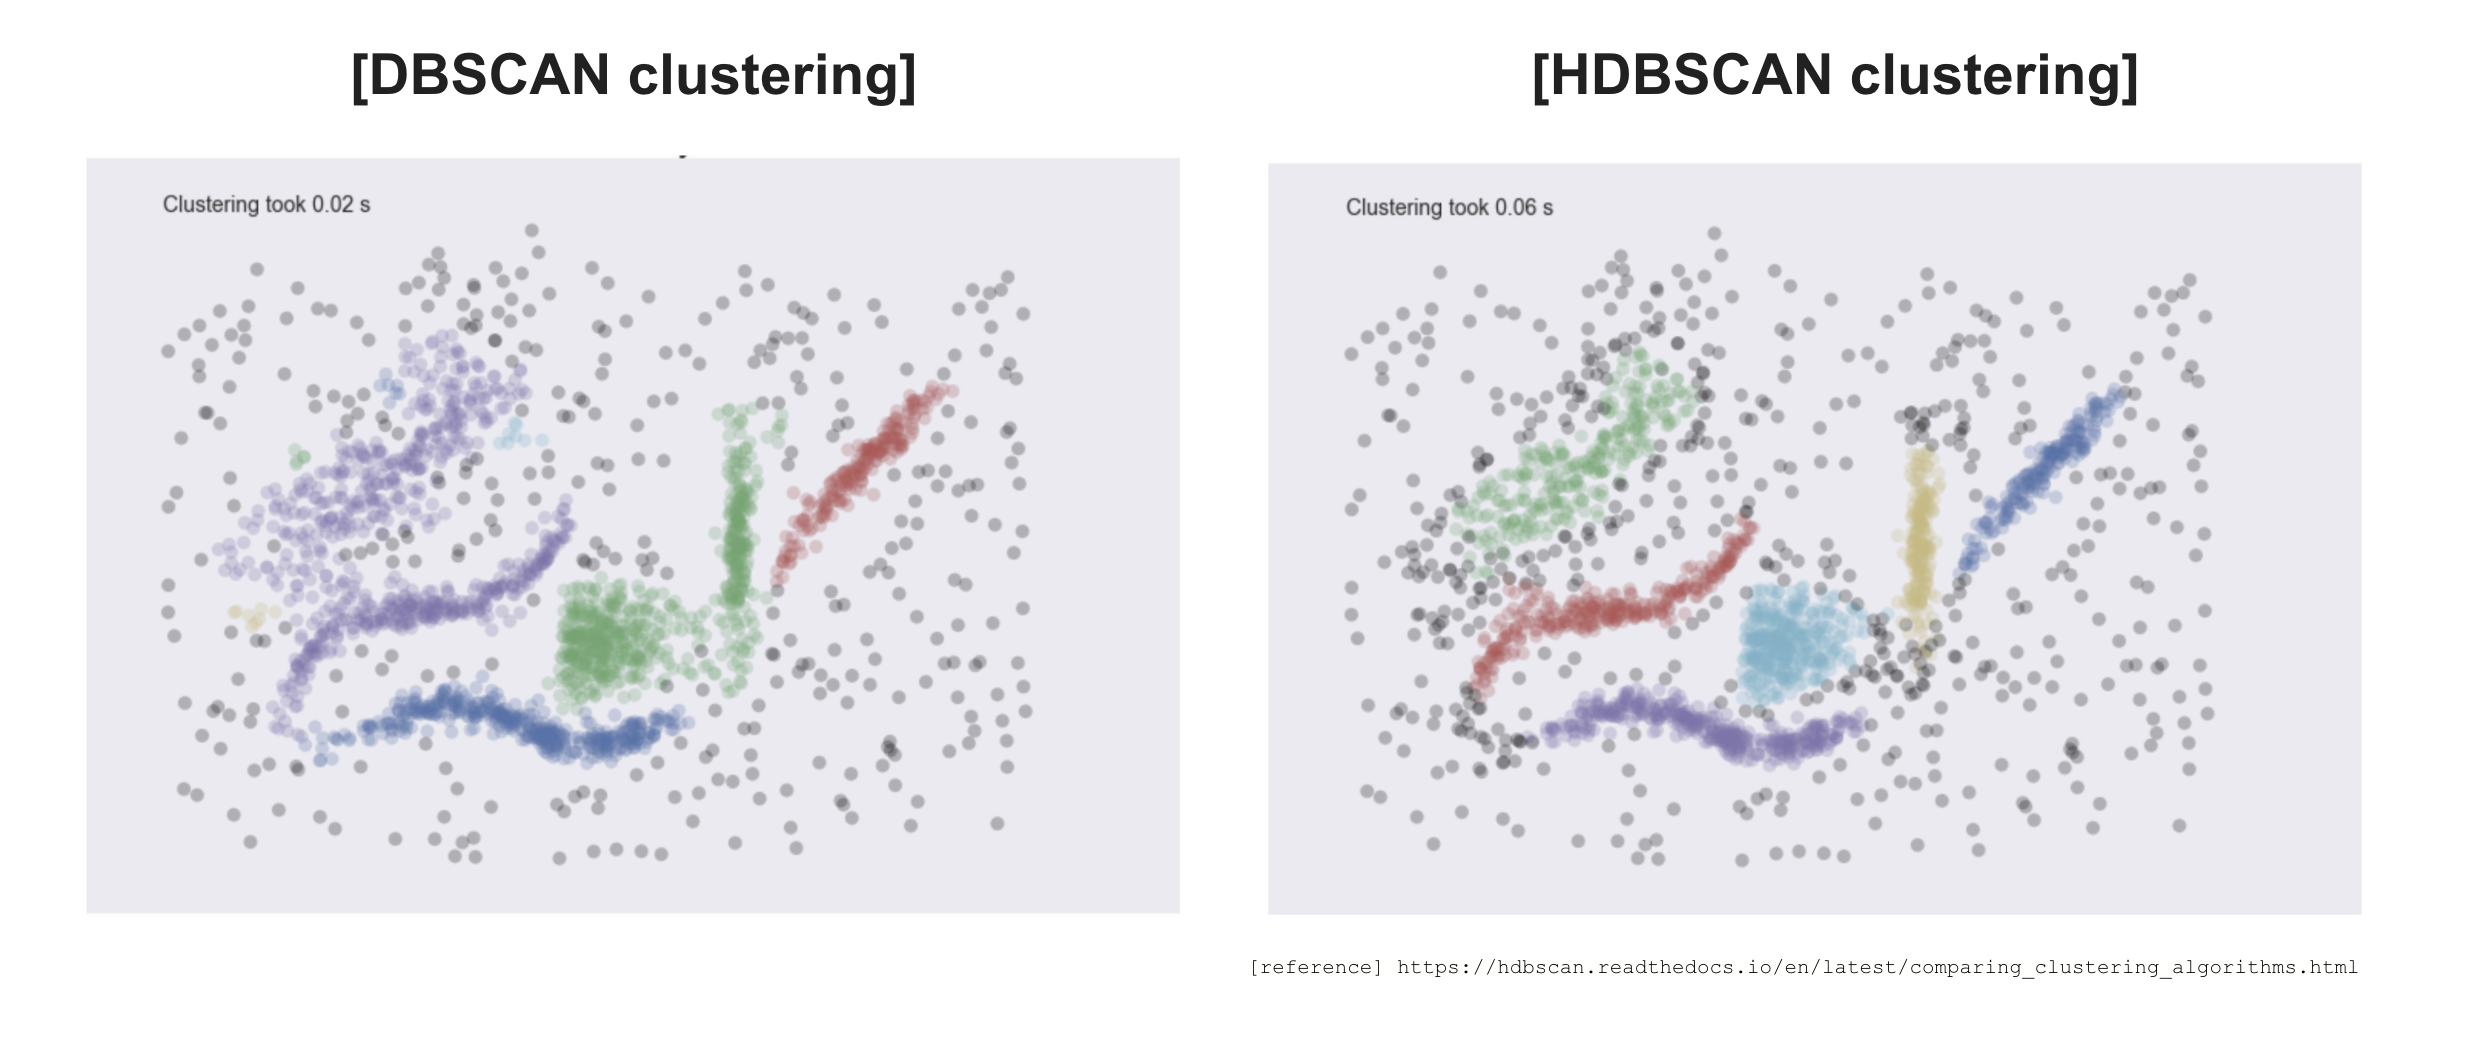

### 문제 30. Clustering : HDBSCAN - 다양한 분포/사이즈의 데이터 생성하기.


In [86]:
from sklearn.datasets import make_blobs

# HDBSCAN을 훈련시킬 데이터를 생성해보세요.
moons, _ = make_moons(n_samples=100, noise=0.05)
blobs1, _ = make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
blobs2, _ = make_blobs(n_samples=30, centers=[(-0.3,-1), (4.0, 1.5)], cluster_std=0.3)
blobs3, _ = make_blobs(n_samples=100, centers=[(3,-1), (4.0, 1.5)], cluster_std=0.4)

hdb_data = np.vstack([moons, blobs1, blobs2, blobs3])
hdb_data_df = pd.DataFrame(hdb_data, columns=["x", "y"])
hdb_data_df.head()


x         y
0  0.038317  0.349703
1  0.072076  0.932937
2  0.109887 -0.069860
3  1.829535 -0.090335
4 -0.936041  0.054571

In [87]:
# scatter plot 생성.
fig = px.scatter(hdb_data_df, x="x", y="y")
# 그래프 사이즈 조절.
fig.update_layout(width=600, height=500, title="HDBSCAN 데이터 분포")
# 그래프 확인.
fig.show()

### 문제 31. Clustering : HDBSCAN - HDBSCAN 알고리즘 탐색하기.
: 사용할 모듈을 install & import 하고, HDBSCAN 알고리즘의 파라미터를 살펴봅니다.   

[HDBSCAN 모듈 페이지 바로가기 >>](https://pypi.org/project/hdbscan/)

[Parameters]
```
- min_cluster_size (default=5): 군집화를 위한 최소한의 cluster 사이즈.
- min_samples (default=None) : 반경내 있어야할 최소 data points.
- cluster_selection_epsilon(default=0.0): 거리 기준. 이 기준보다 아래의 거리는 cluster끼리 merge 됨.
```

In [88]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 7.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342151 sha256=ea0b0b32783ad6641e096895bb925af2addb049be91790db5dd7887483ecc18b
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [89]:
# hdbscan 모듈을 import 합니다.
import hdbscan
hdbscan_model = hdbscan.HDBSCAN()
# help(hdbscan_model)

### 문제 32. Clustering : HDBSCAN - HDBSCAN 알고리즘 훈련시키기.

In [90]:
# HDBSCAN의 파라미터인 min_cluster_size 설정해봅시다.
# min_cluster_size=5
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)


In [91]:
# 위문제에서 생성한 moon_data를 훈련시켜보세요.
hdbscan_model.fit(hdb_data)

HDBSCAN()

In [92]:
# 훈련된 결과 label을 확인해보세요.
hdbscan_label = hdbscan_model.fit_predict(hdb_data)
hdbscan_label[:10]
# 분류된 label의 총 갯수를 확인해보세요.
set(hdbscan_label) 

{-1, 0, 1, 2, 3, 4, 5, 6}

### 문제 33. Clustering : HDBSCAN - HDBSCAN 알고리즘 파라미터 비교하기.
: min_cluster_size, min_samples, cluster_selection_epsilon 파라미터를 변화하면서 훈련된 label에 어떤 영향을 주는지 확인해봅시다.

In [93]:
# 위의 HDBSCAN 훈련 결과를 plotly를 사용하여 시각화로 나타내보세요.
hdb_data_df["hdbscan_label"] = hdbscan_label
hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
fig.update_layout(width=600, height=500)
fig.show()

In [94]:
# min_cluster_size 파라미터가 3,5,7,9,13일때 clusters의 차이를 비교해보세요.
for mcn in [3,5,7,9,13]:
  hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=mcn, min_samples=None, prediction_data=True).fit_predict(hdb_data)
  hdb_data_df["hdbscan_label"] = hdbscan_label
  hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

  # outlier 추세확인.
  hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
  outliers = hdbscan_case_dict[-1]

  fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
  fig.update_layout(width=600, height=500, title=f"min_cluster_size={mcn} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
  fig.show()



In [95]:
# min_samples 파라미터가 3,5,7,9,13일때 clusters의 차이를 비교해보세요.
for ms in [3,5,7,9,13]:
  hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=ms, prediction_data=True).fit_predict(hdb_data)
  hdb_data_df["hdbscan_label"] = hdbscan_label
  hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

  # outlier 추세확인.
  hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
  outliers = hdbscan_case_dict[-1]

  fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
  fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
  fig.show()



In [96]:
# cluster_selection_epsilon 파라미터가 0.1,0.5,0.7,1.0 일때 clusters의 차이를 비교해보세요.
for cse in [0.1,0.5,0.7,1.0]:
  hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=cse, prediction_data=True).fit_predict(hdb_data)
  hdb_data_df["hdbscan_label"] = hdbscan_label
  hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

  # outlier 추세확인.
  hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
  outliers = hdbscan_case_dict[-1]

  fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
  fig.update_layout(width=600, height=500, title=f"cluster_selection_epsilon={cse} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
  fig.show()


KeyError: ignored

### 문제 34. Clustering : HDBSCAN - HDBSCAN의 다양한 시각화 확인하기.
: HDBSCAN 알고리즘에서 사용되는 시각화를 해석해보세요.

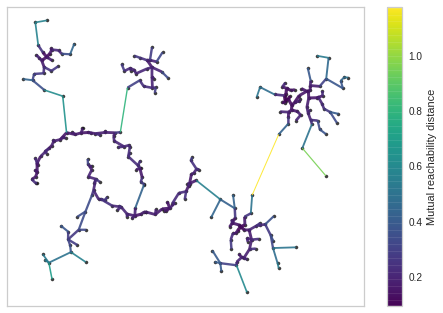

In [97]:
# [문제 33]에서 최적으로 판단되는 파라미터를 사용해 hdbscan 모델을 훈련시켜보세요.
# [참고] 시각화 생성을 위해 gen_min_span_tree=True로 훈련시켜야 합니다.
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.1, gen_min_span_tree=True).fit(hdb_data)

# 훈련된 모델을 사용해서 minimum_spanning_tree 를 생성해보세요.
# 각 point를 이어주는 line을 distance를 점수화한 mutual reachabillity를 사용하여 나타낸 그래프입니다.
# point간의 거리를 나타낸 것이 아닌, line은 그려나가면서 아직 추가되지 않은 point들 중에서 mutual reachabillity가 가장 낮은 point를 하나씩만 추가하는 방식으로 진행.
hdbscan_model.minimum_spanning_tree_.plot(edge_cmap="viridis", 
                                      edge_alpha=0.9, 
                                      node_size=10, 
                                      edge_linewidth=1)


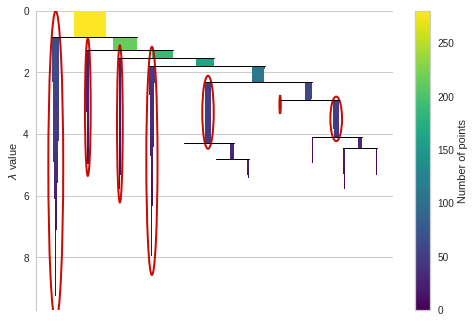

In [98]:
# 훈련된 모델을 사용해서 condensed_tree 를 생성해보세요.
# [참고] cluster도 함께 보기위해 select_clusters=True로 설정해주세요.
# 가장 오래 버틴 cluster 순으로 cluster을 분류합니다. 
hdbscan_model.condensed_tree_.plot(select_clusters=True)


### 문제 35. Clustering : HDBSCAN - HDBSCAN와 K-means의 성능 비교하기.

In [99]:
# 7개의 그룹으로 k-means를 훈련시켜보세요.
hdb_data_km = KMeans(n_clusters=7).fit(hdb_data)
hdb_data_km

KMeans(n_clusters=7)

In [100]:
# 최적의 파라미터로 hdbscan를 훈련시켜보세요.
hdb_data_hdbscan_lable = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.1, gen_min_span_tree=True).fit_predict(hdb_data)
hdb_data_hdbscan_lable[:10]


array([6, 4, 6, 6, 4, 4, 6, 6, 4, 6])

In [101]:
hdb_data_df.head()

x         y hdbscan_label
0  0.038317  0.349703             2
1  0.072076  0.932937             2
2  0.109887 -0.069860             2
3  1.829535 -0.090335             2
4 -0.936041  0.054571             2

In [102]:
# k-means 결과를 plotly를 사용하여 시각화로 나타내고, hdbscan의 결과와 비교해보세요.
hdb_data_df["kmeans_label"] = hdb_data_km.labels_
hdb_data_df["kmeans_label"] = hdb_data_df["kmeans_label"].astype(str)

hdb_data_df["hdbscan_label"] = hdb_data_hdbscan_lable
hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

for label_case in ["hdbscan_label", "kmeans_label"]:
  fig = px.scatter(hdb_data_df, x="x", y="y", color=label_case)
  fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
  fig.show()

### 문제 36. Clustering : HDBSCAN - HDBSCAN와 DBSCAN의 성능 비교하기.

In [103]:
hdb_data_dbscan = DBSCAN(eps=0.3, min_samples=5).fit(hdb_data)
hdb_data_df["dbscan_label"] = hdb_data_dbscan.labels_
hdb_data_df["dbscan_label"] = hdb_data_df["dbscan_label"].astype(str)

for label_case in ["hdbscan_label", "dbscan_label"]:
  fig = px.scatter(hdb_data_df, x="x", y="y", color=label_case)
  fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
  fig.show()


### 문제 37. Clustering : HDBSCAN - 데이터 분포에 따른 HDBSCAN와 DBSCAN의 차이 확인하기.
: 데이터의 분산차이와 points 수 차이에 따른 알고리즘 성능의 차이를 확인해보세요.

In [104]:
# HDBSCAN와 DBSCAN을 비교할 데이터를 생성해보세요.
# [참고] 분산이 극단적인 두가지 케이스를 생성해봅니다.
blobs1, _ = make_blobs(n_samples=200, centers=[(-10, 5), (0, -5)], cluster_std=0.5)
blobs2, _ = make_blobs(n_samples=200, centers=[(30, -1), (30, 1.5)], cluster_std=5.0)

comp_data = np.vstack([blobs1, blobs2])
comp_data_df = pd.DataFrame(comp_data, columns=["x", "y"])

In [105]:
# scatter plot 생성.
fig = px.scatter(comp_data_df, x="x", y="y")
# 그래프 사이즈 조절.
fig.update_layout(width=600, height=500, title="데이터 분포")
# 그래프 확인.
fig.show()

In [106]:
# 생성된 데이터를 사용하여 dbscan와 hdbscan을 훈련시켜보세요.
# 시각화를 위해, 각 모델의 label을 dataframe에 저장하고 string으로 변환하여주세요. 

# dbscan를 훈련시켜보세요.
dbscan_model = DBSCAN(eps=0.6, min_samples=10).fit(comp_data)
comp_data_df["dbscan_label"] = dbscan_model.labels_
comp_data_df["dbscan_label"] = comp_data_df["dbscan_label"].astype(str)

# hdbscan를 훈련시켜보세요.
hdbscan_lables = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.1, gen_min_span_tree=True).fit_predict(comp_data)
comp_data_df["hdbscan_label"] = hdbscan_lables
comp_data_df["hdbscan_label"] = comp_data_df["hdbscan_label"].astype(str)



In [107]:
# 시각화하기 이전에, outlier를 구분하기 위한 color 컬럼을 생성해주세요.
# [참고] 아래 color_dict를 사용해주세요.
color_dict = {"-1":"#d8d8d8", "0":"#ff5e5b", "1":"#457b9d", "2":"#00cecb", "3":"#FFED66"}
comp_data_df["dbscan_label_color"] = comp_data_df["dbscan_label"].map(color_dict)
comp_data_df["hdbscan_label_color"] = comp_data_df["hdbscan_label"].map(color_dict)

# 두 모델 결과를 시각화로 나타내고 차이가 나타나는지 확인해보세요.
# [참고] 회색으로 나타나는 point는 outlier로 분류된 points입니다.
for label_case in ["hdbscan_label", "dbscan_label"]:
  fig = go.Figure(data=go.Scatter( 
      x=comp_data_df["x"], 
      y=comp_data_df["y"],
      mode="markers",
      marker=dict(color=comp_data_df[label_case+"_color"], showscale=True)
  ))
  fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
  fig.show()


## Chapter01 마무리
- label이 정해지지 않은 데이터의 분류 목적으로 사용되는 만큼, 모델 선택부터 평가까지 자유도가 높은 편입니다.  
- 다양한 알고리즘의 차이를 기억하고, 데이터에 적합한 알고리즘을 사용하여 비교하는 것이 중요합니다.
- 군집화의 목적에 따라 평가 지표를 자유롭게 조절하는 것이 중요합니다.
- [다양한 군집화 알고리즘 비교 바로가기 >>](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)